In [1]:
%pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [2]:
%pip install torch optuna

In [3]:
!pip install bayesian-optimization
!pip install keras

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv('data.csv', encoding='ISO-8859-1')  # Lectura de caracteres o signos especiales del espanol


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701083 entries, 0 to 701082
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Dia                 701083 non-null  object 
 1   Hora                701083 non-null  object 
 2   Latitud Central     701083 non-null  float64
 3   Longitud Central    701083 non-null  float64
 4   Tipo de Via         701083 non-null  object 
 5   Congestion          701083 non-null  object 
 6   Congestion_Numeric  701083 non-null  int64  
 7   Distance            701083 non-null  float64
 8   Duration            701083 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 48.1+ MB


In [ ]:
data.describe().T

count       mean        std        min        25%  \
Latitud Central     701083.0 -12.123855   0.045094 -12.225161 -12.159201   
Longitud Central    701083.0 -77.018400   0.031615 -77.110631 -77.034910   
Congestion_Numeric  701083.0   3.983951   9.269304  -1.000000  -1.000000   
Distance            701083.0  42.452196  42.411308   0.000000  10.800000   
Duration            701083.0   7.929850   8.110030   0.000000   2.113000   

                          50%        75%         max  
Latitud Central    -12.111800 -12.086533  -12.051969  
Longitud Central   -77.014755 -76.994466  -76.953908  
Congestion_Numeric   0.000000   4.000000   91.000000  
Distance            27.100000  61.700000  726.300000  
Duration             5.172000  11.227500  165.029000

In [ ]:
data.head()

Dia   Hora  Latitud Central  Longitud Central  \
0  Sunday  20:20       -12.218011        -76.977544   
1  Sunday  20:20       -12.219672        -76.976457   
2  Sunday  20:20       -12.220101        -76.975983   
3  Sunday  20:20       -12.214297        -76.982415   
4  Sunday  20:20       -12.217824        -76.978839   

                  Tipo de Via Congestion  Congestion_Numeric  Distance  \
0  carretera panamericana sur    unknown                  -1       7.8   
1  carretera panamericana sur        low                   0      19.3   
2  carretera panamericana sur        low                  17      17.7   
3    avenida caminos del inca        low                   0      19.1   
4    avenida caminos del inca    unknown                  -1      20.9   

   Duration  
0     1.846  
1     0.722  
2     5.536  
3     1.723  
4     5.026

In [5]:
from sklearn.preprocessing import LabelEncoder

# Convertir el día a valores numéricos (label encoding)
label_encoder = LabelEncoder()
data['Dia'] = label_encoder.fit_transform(data['Dia'])
data.head()

Dia   Hora  Latitud Central  Longitud Central                 Tipo de Via  \
0    1  20:20       -12.218011        -76.977544  carretera panamericana sur   
1    1  20:20       -12.219672        -76.976457  carretera panamericana sur   
2    1  20:20       -12.220101        -76.975983  carretera panamericana sur   
3    1  20:20       -12.214297        -76.982415    avenida caminos del inca   
4    1  20:20       -12.217824        -76.978839    avenida caminos del inca   

  Congestion  Congestion_Numeric  Distance  Duration  
0    unknown                  -1       7.8     1.846  
1        low                   0      19.3     0.722  
2        low                  17      17.7     5.536  
3        low                   0      19.1     1.723  
4    unknown                  -1      20.9     5.026

In [6]:
# Convertir la hora a minutos totales desde medianoche
data['Hora'] = pd.to_datetime(data['Hora'], format='%H:%M').dt.hour * 60 + pd.to_datetime(data['Hora'], format='%H:%M').dt.minute
data.head()

Dia  Hora  Latitud Central  Longitud Central                 Tipo de Via  \
0    1  1220       -12.218011        -76.977544  carretera panamericana sur   
1    1  1220       -12.219672        -76.976457  carretera panamericana sur   
2    1  1220       -12.220101        -76.975983  carretera panamericana sur   
3    1  1220       -12.214297        -76.982415    avenida caminos del inca   
4    1  1220       -12.217824        -76.978839    avenida caminos del inca   

  Congestion  Congestion_Numeric  Distance  Duration  
0    unknown                  -1       7.8     1.846  
1        low                   0      19.3     0.722  
2        low                  17      17.7     5.536  
3        low                   0      19.1     1.723  
4    unknown                  -1      20.9     5.026

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701083 entries, 0 to 701082
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Dia                 701083 non-null  int32  
 1   Hora                701083 non-null  int32  
 2   Latitud Central     701083 non-null  float64
 3   Longitud Central    701083 non-null  float64
 4   Tipo de Via         701083 non-null  object 
 5   Congestion          701083 non-null  object 
 6   Congestion_Numeric  701083 non-null  int64  
 7   Distance            701083 non-null  float64
 8   Duration            701083 non-null  float64
dtypes: float64(4), int32(2), int64(1), object(2)
memory usage: 42.8+ MB


In [7]:
data = data.drop(columns='Congestion', axis=1)
data.head()

Dia  Hora  Latitud Central  Longitud Central                 Tipo de Via  \
0    1  1220       -12.218011        -76.977544  carretera panamericana sur   
1    1  1220       -12.219672        -76.976457  carretera panamericana sur   
2    1  1220       -12.220101        -76.975983  carretera panamericana sur   
3    1  1220       -12.214297        -76.982415    avenida caminos del inca   
4    1  1220       -12.217824        -76.978839    avenida caminos del inca   

   Congestion_Numeric  Distance  Duration  
0                  -1       7.8     1.846  
1                   0      19.3     0.722  
2                  17      17.7     5.536  
3                   0      19.1     1.723  
4                  -1      20.9     5.026

In [8]:
df_original = data
df_original.head()

Dia  Hora  Latitud Central  Longitud Central                 Tipo de Via  \
0    1  1220       -12.218011        -76.977544  carretera panamericana sur   
1    1  1220       -12.219672        -76.976457  carretera panamericana sur   
2    1  1220       -12.220101        -76.975983  carretera panamericana sur   
3    1  1220       -12.214297        -76.982415    avenida caminos del inca   
4    1  1220       -12.217824        -76.978839    avenida caminos del inca   

   Congestion_Numeric  Distance  Duration  
0                  -1       7.8     1.846  
1                   0      19.3     0.722  
2                  17      17.7     5.536  
3                   0      19.1     1.723  
4                  -1      20.9     5.026

In [9]:
data = data[data['Congestion_Numeric'] != -1]
data.head()

Dia  Hora  Latitud Central  Longitud Central                 Tipo de Via  \
1    1  1220       -12.219672        -76.976457  carretera panamericana sur   
2    1  1220       -12.220101        -76.975983  carretera panamericana sur   
3    1  1220       -12.214297        -76.982415    avenida caminos del inca   
5    1  1220       -12.219575        -76.977372    avenida caminos del inca   
9    1  1220       -12.216620        -76.980104               motorway_link   

   Congestion_Numeric  Distance  Duration  
1                   0      19.3     0.722  
2                  17      17.7     5.536  
3                   0      19.1     1.723  
5                   0       7.9     0.682  
9                   0      39.0     2.924

In [10]:
data = data[data['Tipo de Via'] == 'avenida primavera']
data.head()

Dia  Hora  Latitud Central  Longitud Central        Tipo de Via  \
3647    1  1232       -12.108883        -76.977992  avenida primavera   
3648    1  1232       -12.110127        -76.978109  avenida primavera   
3672    1  1232       -12.111602        -76.978505  avenida primavera   
3673    1  1232       -12.110278        -76.978233  avenida primavera   
4342    1  1234       -12.110723        -76.984512  avenida primavera   

      Congestion_Numeric  Distance  Duration  
3647                   0      11.0     1.651  
3648                   0      38.4     3.841  
3672                   0      16.6     1.868  
3673                   0      41.5     4.978  
4342                  16      15.7     4.040

In [11]:

X = data[['Dia','Hora','Latitud Central','Longitud Central','Tipo de Via']]
y = data['Congestion_Numeric']

X = pd.get_dummies(X, columns=['Tipo de Via'])

In [12]:
X.sample()

Dia  Hora  Latitud Central  Longitud Central  \
244086    2   708       -12.110792        -76.987609   

        Tipo de Via_avenida primavera  
244086                           True

In [13]:
X.replace({True: 1, False: 0}, inplace=True)

X.head()

<ipython-input-13-f36ac9cdf4a8>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.replace({True: 1, False: 0}, inplace=True)


Dia  Hora  Latitud Central  Longitud Central  \
3647    1  1232       -12.108883        -76.977992   
3648    1  1232       -12.110127        -76.978109   
3672    1  1232       -12.111602        -76.978505   
3673    1  1232       -12.110278        -76.978233   
4342    1  1234       -12.110723        -76.984512   

      Tipo de Via_avenida primavera  
3647                              1  
3648                              1  
3672                              1  
3673                              1  
4342                              1

In [ ]:
"""
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Escalado de X (que ya lo tienes):
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# Escalado de y:
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler_y.transform(y_test.values.reshape(-1, 1))

# Conversión a tensores de PyTorch:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)
"""

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split

# se divide el dataset entre train, test y validation
# este ultimo es para el ajuste de hiperparametros

# se separa entrenamiento del resto (test y validation)
X_train, X_Combine, y_train, y_Combine = train_test_split(X,y,
                                              train_size=0.8,
                                              random_state=42)

# del resto se separan entre test y validation
X_val, X_test, y_val, y_test = train_test_split(X_Combine,
                                                y_Combine,
                                                test_size=0.5,
                                                random_state=42)


In [16]:
from sklearn.preprocessing import StandardScaler
# Escalado de X (que ya lo tienes):
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
X_val = scaler_X.transform(X_val)

# Escalado de y:
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler_y.transform(y_test.values.reshape(-1, 1))
y_val = scaler_y.transform(y_val.values.reshape(-1, 1))

In [20]:
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adadelta, Adam, RMSprop, SGD, Adagrad, Nadam, Adamax, Ftrl

def objective_fun(params):
  #defining the initial version of the neural network
  model = Sequential()
  model.add(layers.Flatten())
  input_dim = X_train.shape[1]
  model.add(layers.Dense(params['hiddenLayerOne'], activation=params['activation'], input_dim=input_dim))
  model.add(layers.Dropout(params['dropout']))
  model.add(layers.Dense(params['hiddenLayerTwo'], activation=params['activation']))
  model.add(layers.Dropout(params['dropout']))
  model.add(layers.Dense(3, activation='softmax'))

  model.compile(optimizer=params['optimizer'](params['learning_rate']),
                loss='categorical_crossentropy', metrics=['accuracy'])

  input_shape = X_train.shape
  model.build(input_shape=input_shape)
  es = EarlyStopping(monitor='val_loss',mode='min',
                       verbose=1,patience=15)

  model.fit(X_train, y_train, validation_data=(X_val, y_val))

  score, acc = model.evaluate(X_val, y_val, verbose=0)
  print('Test accuracy:', acc)
  return {'loss': -acc,
          'status': STATUS_OK,
          'model': model,
          'params': params}

In [22]:
import hyperopt
from hyperopt import hp, fmin, tpe, Trials, space_eval, STATUS_OK

param_space = {
      "activation": hp.choice("activation",['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', 'softmax']),
      "optimizer": hp.choice("optimizer",[SGD, Adam, RMSprop, Adagrad, Adamax, Nadam, Ftrl]),
      "learning_rate": hp.uniform("learning_rate",0.001,1),
      "epochs": hp.uniform("epochs",10,100),
      "hiddenLayerOne": hp.uniform("hiddenLayerOne",10,100),
      "hiddenLayerTwo": hp.uniform("hiddenLayerTwo",10,100),
      "dropout": hp.choice("dropout", [0.1, 0.4, 0.6])
  }

In [23]:
trials = Trials()

In [24]:
best_params = fmin(
  fn=objective_fun,
  space=param_space,
  algo=tpe.suggest,
  max_evals=200,
  trials=trials)

  0%|          | 0/200 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)

ERROR:hyperopt.fmin:job exception: Cannot convert '(5, 50.745352627223966)' to a shape. Found invalid entry '50.745352627223966' of type '<class 'float'>'. 


  0%|          | 0/200 [00:00<?, ?trial/s, best loss=?]


ValueError: Cannot convert '(5, 50.745352627223966)' to a shape. Found invalid entry '50.745352627223966' of type '<class 'float'>'. 

In [ ]:
# Define tu modelo de red neuronal
class TrafficModel(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(TrafficModel, self).__init__()
        layers = []
        in_size = input_size
        for h in hidden_sizes:
            layers.append(nn.Linear(in_size, h))
            layers.append(nn.ReLU())
            in_size = h
        layers.append(nn.Linear(in_size, output_size))
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

# Función objetivo para la optimización de hiperparámetros
def objective(trial):
    # Define el espacio de búsqueda de hiperparámetros
    lr = trial.suggest_loguniform('lr', 1e-3, 1e-2)
    num_layers = trial.suggest_int('num_layers', 1, 10)
    hidden_size = trial.suggest_int('hidden_size', 64, 256)
    print(lr,num_layers, hidden_size)
    # Define el modelo
    model = TrafficModel(input_size=X_train.shape[1], hidden_sizes=[hidden_size] * num_layers, output_size=1)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Bucle de entrenamiento simplificado
    for epoch in range(1000):  # Ajusta el número de épocas según sea necesario
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        print(loss)
        loss.backward()
        optimizer.step()

    # Calcular pérdida de validación
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)
        print(loss)

    return val_loss.item()

# Ejecutar la optimización con Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

# Imprimir los mejores hiperparámetros encontrados
print("Best hyperparameters: ", study.best_params)

[I 2024-10-26 08:23:56,047] A new study created in memory with name: no-name-941a3201-1468-41e2-9630-8c2ea01921d1
C:\Users\Ibrahim\AppData\Local\Temp\ipykernel_12252\3610424574.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-3, 1e-2)


0.007302728379300678 3 120
tensor(1.0004, grad_fn=<MseLossBackward0>)
tensor(1.0241, grad_fn=<MseLossBackward0>)
tensor(1.0539, grad_fn=<MseLossBackward0>)
tensor(0.9984, grad_fn=<MseLossBackward0>)
tensor(0.9834, grad_fn=<MseLossBackward0>)
tensor(0.9854, grad_fn=<MseLossBackward0>)
tensor(0.9879, grad_fn=<MseLossBackward0>)
tensor(0.9881, grad_fn=<MseLossBackward0>)
tensor(0.9859, grad_fn=<MseLossBackward0>)
tensor(0.9822, grad_fn=<MseLossBackward0>)
tensor(0.9778, grad_fn=<MseLossBackward0>)
tensor(0.9734, grad_fn=<MseLossBackward0>)
tensor(0.9691, grad_fn=<MseLossBackward0>)
tensor(0.9645, grad_fn=<MseLossBackward0>)
tensor(0.9599, grad_fn=<MseLossBackward0>)
tensor(0.9558, grad_fn=<MseLossBackward0>)
tensor(0.9520, grad_fn=<MseLossBackward0>)
tensor(0.9493, grad_fn=<MseLossBackward0>)
tensor(0.9474, grad_fn=<MseLossBackward0>)
tensor(0.9453, grad_fn=<MseLossBackward0>)
tensor(0.9424, grad_fn=<MseLossBackward0>)
tensor(0.9386, grad_fn=<MseLossBackward0>)
tensor(0.9353, grad_fn=<Mse

[I 2024-10-26 08:24:01,197] Trial 0 finished with value: 0.8750655651092529 and parameters: {'lr': 0.007302728379300678, 'num_layers': 3, 'hidden_size': 120}. Best is trial 0 with value: 0.8750655651092529.


tensor(0.1836, grad_fn=<MseLossBackward0>)
tensor(0.1822, grad_fn=<MseLossBackward0>)
0.00849919315449979 1 206
tensor(1.0326, grad_fn=<MseLossBackward0>)
tensor(1.0558, grad_fn=<MseLossBackward0>)
tensor(1.0033, grad_fn=<MseLossBackward0>)
tensor(0.9920, grad_fn=<MseLossBackward0>)
tensor(1.0135, grad_fn=<MseLossBackward0>)
tensor(1.0012, grad_fn=<MseLossBackward0>)
tensor(0.9774, grad_fn=<MseLossBackward0>)
tensor(0.9739, grad_fn=<MseLossBackward0>)
tensor(0.9843, grad_fn=<MseLossBackward0>)
tensor(0.9848, grad_fn=<MseLossBackward0>)
tensor(0.9739, grad_fn=<MseLossBackward0>)
tensor(0.9663, grad_fn=<MseLossBackward0>)
tensor(0.9678, grad_fn=<MseLossBackward0>)
tensor(0.9697, grad_fn=<MseLossBackward0>)
tensor(0.9652, grad_fn=<MseLossBackward0>)
tensor(0.9582, grad_fn=<MseLossBackward0>)
tensor(0.9553, grad_fn=<MseLossBackward0>)
tensor(0.9560, grad_fn=<MseLossBackward0>)
tensor(0.9551, grad_fn=<MseLossBackward0>)
tensor(0.9510, grad_fn=<MseLossBackward0>)
tensor(0.9470, grad_fn=<MseL

[I 2024-10-26 08:24:03,306] Trial 1 finished with value: 0.8614886999130249 and parameters: {'lr': 0.00849919315449979, 'num_layers': 1, 'hidden_size': 206}. Best is trial 1 with value: 0.8614886999130249.


tensor(0.7033, grad_fn=<MseLossBackward0>)
tensor(0.7034, grad_fn=<MseLossBackward0>)
tensor(0.7037, grad_fn=<MseLossBackward0>)
tensor(0.7043, grad_fn=<MseLossBackward0>)
tensor(0.7053, grad_fn=<MseLossBackward0>)
tensor(0.7066, grad_fn=<MseLossBackward0>)
tensor(0.7084, grad_fn=<MseLossBackward0>)
tensor(0.7106, grad_fn=<MseLossBackward0>)
tensor(0.7126, grad_fn=<MseLossBackward0>)
tensor(0.7135, grad_fn=<MseLossBackward0>)
tensor(0.7126, grad_fn=<MseLossBackward0>)
tensor(0.7092, grad_fn=<MseLossBackward0>)
tensor(0.7053, grad_fn=<MseLossBackward0>)
tensor(0.7031, grad_fn=<MseLossBackward0>)
tensor(0.7033, grad_fn=<MseLossBackward0>)
tensor(0.7050, grad_fn=<MseLossBackward0>)
tensor(0.7067, grad_fn=<MseLossBackward0>)
tensor(0.7071, grad_fn=<MseLossBackward0>)
tensor(0.7056, grad_fn=<MseLossBackward0>)
tensor(0.7034, grad_fn=<MseLossBackward0>)
tensor(0.7019, grad_fn=<MseLossBackward0>)
tensor(0.7021, grad_fn=<MseLossBackward0>)
tensor(0.7032, grad_fn=<MseLossBackward0>)
tensor(0.70

[I 2024-10-26 08:24:06,290] Trial 2 finished with value: 0.7972954511642456 and parameters: {'lr': 0.0036680906598916896, 'num_layers': 3, 'hidden_size': 69}. Best is trial 2 with value: 0.7972954511642456.


tensor(0.3762, grad_fn=<MseLossBackward0>)
tensor(0.3772, grad_fn=<MseLossBackward0>)
tensor(0.3775, grad_fn=<MseLossBackward0>)
tensor(0.3690, grad_fn=<MseLossBackward0>)
tensor(0.3610, grad_fn=<MseLossBackward0>)
tensor(0.3499, grad_fn=<MseLossBackward0>)
tensor(0.3428, grad_fn=<MseLossBackward0>)
tensor(0.3405, grad_fn=<MseLossBackward0>)
tensor(0.3425, grad_fn=<MseLossBackward0>)
tensor(0.3479, grad_fn=<MseLossBackward0>)
tensor(0.3553, grad_fn=<MseLossBackward0>)
tensor(0.3667, grad_fn=<MseLossBackward0>)
tensor(0.3761, grad_fn=<MseLossBackward0>)
tensor(0.3885, grad_fn=<MseLossBackward0>)
tensor(0.3867, grad_fn=<MseLossBackward0>)
tensor(0.3817, grad_fn=<MseLossBackward0>)
tensor(0.3637, grad_fn=<MseLossBackward0>)
tensor(0.3486, grad_fn=<MseLossBackward0>)
tensor(0.3398, grad_fn=<MseLossBackward0>)
tensor(0.3410, grad_fn=<MseLossBackward0>)
tensor(0.3498, grad_fn=<MseLossBackward0>)
tensor(0.3611, grad_fn=<MseLossBackward0>)
tensor(0.3751, grad_fn=<MseLossBackward0>)
tensor(0.38

[I 2024-10-26 08:24:08,594] Trial 3 finished with value: 0.8712249398231506 and parameters: {'lr': 0.0012131294201183163, 'num_layers': 1, 'hidden_size': 215}. Best is trial 2 with value: 0.7972954511642456.


0.0017012644039952592 4 105
tensor(1.0000, grad_fn=<MseLossBackward0>)
tensor(0.9956, grad_fn=<MseLossBackward0>)
tensor(0.9915, grad_fn=<MseLossBackward0>)
tensor(0.9871, grad_fn=<MseLossBackward0>)
tensor(0.9827, grad_fn=<MseLossBackward0>)
tensor(0.9785, grad_fn=<MseLossBackward0>)
tensor(0.9746, grad_fn=<MseLossBackward0>)
tensor(0.9708, grad_fn=<MseLossBackward0>)
tensor(0.9667, grad_fn=<MseLossBackward0>)
tensor(0.9624, grad_fn=<MseLossBackward0>)
tensor(0.9580, grad_fn=<MseLossBackward0>)
tensor(0.9535, grad_fn=<MseLossBackward0>)
tensor(0.9492, grad_fn=<MseLossBackward0>)
tensor(0.9447, grad_fn=<MseLossBackward0>)
tensor(0.9403, grad_fn=<MseLossBackward0>)
tensor(0.9358, grad_fn=<MseLossBackward0>)
tensor(0.9315, grad_fn=<MseLossBackward0>)
tensor(0.9274, grad_fn=<MseLossBackward0>)
tensor(0.9237, grad_fn=<MseLossBackward0>)
tensor(0.9204, grad_fn=<MseLossBackward0>)
tensor(0.9175, grad_fn=<MseLossBackward0>)
tensor(0.9150, grad_fn=<MseLossBackward0>)
tensor(0.9116, grad_fn=<Ms

[I 2024-10-26 08:24:13,941] Trial 4 finished with value: 0.962716817855835 and parameters: {'lr': 0.0017012644039952592, 'num_layers': 4, 'hidden_size': 105}. Best is trial 2 with value: 0.7972954511642456.


tensor(0.2962, grad_fn=<MseLossBackward0>)
tensor(0.2563, grad_fn=<MseLossBackward0>)
tensor(0.2354, grad_fn=<MseLossBackward0>)
tensor(0.2365, grad_fn=<MseLossBackward0>)
0.0011051244481525267 3 224
tensor(1.0051, grad_fn=<MseLossBackward0>)
tensor(0.9892, grad_fn=<MseLossBackward0>)
tensor(0.9843, grad_fn=<MseLossBackward0>)
tensor(0.9772, grad_fn=<MseLossBackward0>)
tensor(0.9735, grad_fn=<MseLossBackward0>)
tensor(0.9706, grad_fn=<MseLossBackward0>)
tensor(0.9655, grad_fn=<MseLossBackward0>)
tensor(0.9615, grad_fn=<MseLossBackward0>)
tensor(0.9587, grad_fn=<MseLossBackward0>)
tensor(0.9546, grad_fn=<MseLossBackward0>)
tensor(0.9504, grad_fn=<MseLossBackward0>)
tensor(0.9465, grad_fn=<MseLossBackward0>)
tensor(0.9426, grad_fn=<MseLossBackward0>)
tensor(0.9393, grad_fn=<MseLossBackward0>)
tensor(0.9355, grad_fn=<MseLossBackward0>)
tensor(0.9319, grad_fn=<MseLossBackward0>)
tensor(0.9287, grad_fn=<MseLossBackward0>)
tensor(0.9253, grad_fn=<MseLossBackward0>)
tensor(0.9223, grad_fn=<Ms

[I 2024-10-26 08:24:24,329] Trial 5 finished with value: 0.9545945525169373 and parameters: {'lr': 0.0011051244481525267, 'num_layers': 3, 'hidden_size': 224}. Best is trial 2 with value: 0.7972954511642456.


tensor(0.3571, grad_fn=<MseLossBackward0>)
tensor(0.3715, grad_fn=<MseLossBackward0>)
tensor(0.3799, grad_fn=<MseLossBackward0>)
tensor(0.3912, grad_fn=<MseLossBackward0>)
tensor(0.3842, grad_fn=<MseLossBackward0>)
tensor(0.3720, grad_fn=<MseLossBackward0>)
tensor(0.3491, grad_fn=<MseLossBackward0>)
tensor(0.3337, grad_fn=<MseLossBackward0>)
tensor(0.3332, grad_fn=<MseLossBackward0>)
tensor(0.3449, grad_fn=<MseLossBackward0>)
tensor(0.3626, grad_fn=<MseLossBackward0>)
tensor(0.3743, grad_fn=<MseLossBackward0>)
tensor(0.3832, grad_fn=<MseLossBackward0>)
tensor(0.3720, grad_fn=<MseLossBackward0>)
tensor(0.3564, grad_fn=<MseLossBackward0>)
0.00307019032806123 8 157
tensor(1.0000, grad_fn=<MseLossBackward0>)
tensor(1.0036, grad_fn=<MseLossBackward0>)
tensor(0.9996, grad_fn=<MseLossBackward0>)
tensor(0.9993, grad_fn=<MseLossBackward0>)
tensor(0.9970, grad_fn=<MseLossBackward0>)
tensor(0.9929, grad_fn=<MseLossBackward0>)
tensor(0.9861, grad_fn=<MseLossBackward0>)
tensor(0.9818, grad_fn=<MseL

[I 2024-10-26 08:24:42,923] Trial 6 finished with value: 1.0945370197296143 and parameters: {'lr': 0.00307019032806123, 'num_layers': 8, 'hidden_size': 157}. Best is trial 2 with value: 0.7972954511642456.


tensor(0.0178, grad_fn=<MseLossBackward0>)
tensor(0.0164, grad_fn=<MseLossBackward0>)
tensor(0.0154, grad_fn=<MseLossBackward0>)
tensor(0.0146, grad_fn=<MseLossBackward0>)
tensor(0.0146, grad_fn=<MseLossBackward0>)
tensor(0.0142, grad_fn=<MseLossBackward0>)
tensor(0.0139, grad_fn=<MseLossBackward0>)
tensor(0.0135, grad_fn=<MseLossBackward0>)
0.002099411724418916 7 210
tensor(1.0020, grad_fn=<MseLossBackward0>)
tensor(0.9998, grad_fn=<MseLossBackward0>)
tensor(0.9979, grad_fn=<MseLossBackward0>)
tensor(0.9940, grad_fn=<MseLossBackward0>)
tensor(0.9875, grad_fn=<MseLossBackward0>)
tensor(0.9813, grad_fn=<MseLossBackward0>)
tensor(0.9794, grad_fn=<MseLossBackward0>)
tensor(0.9789, grad_fn=<MseLossBackward0>)
tensor(0.9710, grad_fn=<MseLossBackward0>)
tensor(0.9641, grad_fn=<MseLossBackward0>)
tensor(0.9634, grad_fn=<MseLossBackward0>)
tensor(0.9510, grad_fn=<MseLossBackward0>)
tensor(0.9492, grad_fn=<MseLossBackward0>)
tensor(0.9459, grad_fn=<MseLossBackward0>)
tensor(0.9316, grad_fn=<Mse

[I 2024-10-26 08:25:08,573] Trial 7 finished with value: 1.2066935300827026 and parameters: {'lr': 0.002099411724418916, 'num_layers': 7, 'hidden_size': 210}. Best is trial 2 with value: 0.7972954511642456.


tensor(0.0535, grad_fn=<MseLossBackward0>)
tensor(0.0518, grad_fn=<MseLossBackward0>)
tensor(0.0501, grad_fn=<MseLossBackward0>)
0.00529057085018008 10 86
tensor(1.0022, grad_fn=<MseLossBackward0>)
tensor(1.0007, grad_fn=<MseLossBackward0>)
tensor(1.0005, grad_fn=<MseLossBackward0>)
tensor(0.9998, grad_fn=<MseLossBackward0>)
tensor(0.9996, grad_fn=<MseLossBackward0>)
tensor(0.9984, grad_fn=<MseLossBackward0>)
tensor(0.9946, grad_fn=<MseLossBackward0>)
tensor(0.9874, grad_fn=<MseLossBackward0>)
tensor(0.9800, grad_fn=<MseLossBackward0>)
tensor(0.9773, grad_fn=<MseLossBackward0>)
tensor(0.9695, grad_fn=<MseLossBackward0>)
tensor(0.9623, grad_fn=<MseLossBackward0>)
tensor(0.9595, grad_fn=<MseLossBackward0>)
tensor(0.9623, grad_fn=<MseLossBackward0>)
tensor(0.9701, grad_fn=<MseLossBackward0>)
tensor(0.9438, grad_fn=<MseLossBackward0>)
tensor(0.9539, grad_fn=<MseLossBackward0>)
tensor(0.9409, grad_fn=<MseLossBackward0>)
tensor(0.9460, grad_fn=<MseLossBackward0>)
tensor(0.9404, grad_fn=<MseL

[I 2024-10-26 08:25:20,047] Trial 8 finished with value: 1.0401628017425537 and parameters: {'lr': 0.00529057085018008, 'num_layers': 10, 'hidden_size': 86}. Best is trial 2 with value: 0.7972954511642456.


tensor(0.3261, grad_fn=<MseLossBackward0>)
tensor(0.2790, grad_fn=<MseLossBackward0>)
tensor(0.3728, grad_fn=<MseLossBackward0>)
tensor(0.2469, grad_fn=<MseLossBackward0>)
tensor(0.2339, grad_fn=<MseLossBackward0>)
tensor(0.2664, grad_fn=<MseLossBackward0>)
0.0026190877208907355 8 69
tensor(1.0044, grad_fn=<MseLossBackward0>)
tensor(1.0010, grad_fn=<MseLossBackward0>)
tensor(0.9997, grad_fn=<MseLossBackward0>)
tensor(1.0000, grad_fn=<MseLossBackward0>)
tensor(1.0002, grad_fn=<MseLossBackward0>)
tensor(0.9995, grad_fn=<MseLossBackward0>)
tensor(0.9985, grad_fn=<MseLossBackward0>)
tensor(0.9972, grad_fn=<MseLossBackward0>)
tensor(0.9955, grad_fn=<MseLossBackward0>)
tensor(0.9933, grad_fn=<MseLossBackward0>)
tensor(0.9907, grad_fn=<MseLossBackward0>)
tensor(0.9875, grad_fn=<MseLossBackward0>)
tensor(0.9833, grad_fn=<MseLossBackward0>)
tensor(0.9784, grad_fn=<MseLossBackward0>)
tensor(0.9732, grad_fn=<MseLossBackward0>)
tensor(0.9675, grad_fn=<MseLossBackward0>)
tensor(0.9613, grad_fn=<Mse

[I 2024-10-26 08:25:27,220] Trial 9 finished with value: 1.0497586727142334 and parameters: {'lr': 0.0026190877208907355, 'num_layers': 8, 'hidden_size': 69}. Best is trial 2 with value: 0.7972954511642456.


tensor(0.3484, grad_fn=<MseLossBackward0>)
tensor(0.3270, grad_fn=<MseLossBackward0>)
0.004537218877633874 5 153
tensor(1.0017, grad_fn=<MseLossBackward0>)
tensor(0.9979, grad_fn=<MseLossBackward0>)
tensor(0.9922, grad_fn=<MseLossBackward0>)
tensor(0.9816, grad_fn=<MseLossBackward0>)
tensor(0.9755, grad_fn=<MseLossBackward0>)
tensor(0.9725, grad_fn=<MseLossBackward0>)
tensor(0.9626, grad_fn=<MseLossBackward0>)
tensor(0.9572, grad_fn=<MseLossBackward0>)
tensor(0.9500, grad_fn=<MseLossBackward0>)
tensor(0.9393, grad_fn=<MseLossBackward0>)
tensor(0.9328, grad_fn=<MseLossBackward0>)
tensor(0.9354, grad_fn=<MseLossBackward0>)
tensor(0.9363, grad_fn=<MseLossBackward0>)
tensor(0.9176, grad_fn=<MseLossBackward0>)
tensor(0.9263, grad_fn=<MseLossBackward0>)
tensor(0.9113, grad_fn=<MseLossBackward0>)
tensor(0.9109, grad_fn=<MseLossBackward0>)
tensor(0.9092, grad_fn=<MseLossBackward0>)
tensor(0.9018, grad_fn=<MseLossBackward0>)
tensor(0.8987, grad_fn=<MseLossBackward0>)
tensor(0.8951, grad_fn=<Mse

[I 2024-10-26 08:25:38,487] Trial 10 finished with value: 1.0173113346099854 and parameters: {'lr': 0.004537218877633874, 'num_layers': 5, 'hidden_size': 153}. Best is trial 2 with value: 0.7972954511642456.


tensor(0.1589, grad_fn=<MseLossBackward0>)
tensor(0.1544, grad_fn=<MseLossBackward0>)
tensor(0.1524, grad_fn=<MseLossBackward0>)
tensor(0.1502, grad_fn=<MseLossBackward0>)
tensor(0.1491, grad_fn=<MseLossBackward0>)
tensor(0.1437, grad_fn=<MseLossBackward0>)
tensor(0.1392, grad_fn=<MseLossBackward0>)
tensor(0.1360, grad_fn=<MseLossBackward0>)
0.009094142431534329 1 182
tensor(1.0100, grad_fn=<MseLossBackward0>)
tensor(1.0212, grad_fn=<MseLossBackward0>)
tensor(1.0032, grad_fn=<MseLossBackward0>)
tensor(0.9907, grad_fn=<MseLossBackward0>)
tensor(0.9912, grad_fn=<MseLossBackward0>)
tensor(0.9857, grad_fn=<MseLossBackward0>)
tensor(0.9781, grad_fn=<MseLossBackward0>)
tensor(0.9784, grad_fn=<MseLossBackward0>)
tensor(0.9796, grad_fn=<MseLossBackward0>)
tensor(0.9745, grad_fn=<MseLossBackward0>)
tensor(0.9674, grad_fn=<MseLossBackward0>)
tensor(0.9636, grad_fn=<MseLossBackward0>)
tensor(0.9638, grad_fn=<MseLossBackward0>)
tensor(0.9647, grad_fn=<MseLossBackward0>)
tensor(0.9621, grad_fn=<Mse

[I 2024-10-26 08:25:40,698] Trial 11 finished with value: 0.8387696743011475 and parameters: {'lr': 0.009094142431534329, 'num_layers': 1, 'hidden_size': 182}. Best is trial 2 with value: 0.7972954511642456.


tensor(0.7040, grad_fn=<MseLossBackward0>)
tensor(0.7037, grad_fn=<MseLossBackward0>)
tensor(0.7036, grad_fn=<MseLossBackward0>)
tensor(0.7036, grad_fn=<MseLossBackward0>)
tensor(0.7037, grad_fn=<MseLossBackward0>)
tensor(0.7038, grad_fn=<MseLossBackward0>)
tensor(0.7040, grad_fn=<MseLossBackward0>)
tensor(0.7042, grad_fn=<MseLossBackward0>)
tensor(0.7044, grad_fn=<MseLossBackward0>)
tensor(0.7045, grad_fn=<MseLossBackward0>)
0.00472759969131476 2 253
tensor(1.0267, grad_fn=<MseLossBackward0>)
tensor(1.1632, grad_fn=<MseLossBackward0>)
tensor(1.1591, grad_fn=<MseLossBackward0>)
tensor(1.0017, grad_fn=<MseLossBackward0>)
tensor(0.9805, grad_fn=<MseLossBackward0>)
tensor(1.0155, grad_fn=<MseLossBackward0>)
tensor(1.0155, grad_fn=<MseLossBackward0>)
tensor(0.9994, grad_fn=<MseLossBackward0>)
tensor(0.9874, grad_fn=<MseLossBackward0>)
tensor(0.9826, grad_fn=<MseLossBackward0>)
tensor(0.9819, grad_fn=<MseLossBackward0>)
tensor(0.9820, grad_fn=<MseLossBackward0>)
tensor(0.9807, grad_fn=<MseL

[I 2024-10-26 08:25:48,707] Trial 12 finished with value: 0.8141065835952759 and parameters: {'lr': 0.00472759969131476, 'num_layers': 2, 'hidden_size': 253}. Best is trial 2 with value: 0.7972954511642456.


tensor(0.3861, grad_fn=<MseLossBackward0>)
tensor(0.3972, grad_fn=<MseLossBackward0>)
tensor(0.4005, grad_fn=<MseLossBackward0>)
tensor(0.3965, grad_fn=<MseLossBackward0>)
tensor(0.3817, grad_fn=<MseLossBackward0>)
tensor(0.3663, grad_fn=<MseLossBackward0>)
tensor(0.3569, grad_fn=<MseLossBackward0>)
tensor(0.3528, grad_fn=<MseLossBackward0>)
tensor(0.3510, grad_fn=<MseLossBackward0>)
tensor(0.3549, grad_fn=<MseLossBackward0>)
tensor(0.3652, grad_fn=<MseLossBackward0>)
tensor(0.3739, grad_fn=<MseLossBackward0>)
0.004146129203278827 3 251
tensor(1.0096, grad_fn=<MseLossBackward0>)
tensor(1.3325, grad_fn=<MseLossBackward0>)
tensor(0.9846, grad_fn=<MseLossBackward0>)
tensor(1.0084, grad_fn=<MseLossBackward0>)
tensor(1.0064, grad_fn=<MseLossBackward0>)
tensor(0.9986, grad_fn=<MseLossBackward0>)
tensor(0.9948, grad_fn=<MseLossBackward0>)
tensor(0.9928, grad_fn=<MseLossBackward0>)
tensor(0.9903, grad_fn=<MseLossBackward0>)
tensor(0.9865, grad_fn=<MseLossBackward0>)
tensor(0.9819, grad_fn=<Mse

[I 2024-10-26 08:26:03,417] Trial 13 finished with value: 0.8466483950614929 and parameters: {'lr': 0.004146129203278827, 'num_layers': 3, 'hidden_size': 251}. Best is trial 2 with value: 0.7972954511642456.


tensor(0.2537, grad_fn=<MseLossBackward0>)
tensor(0.2633, grad_fn=<MseLossBackward0>)
tensor(0.2697, grad_fn=<MseLossBackward0>)
tensor(0.2813, grad_fn=<MseLossBackward0>)
tensor(0.2742, grad_fn=<MseLossBackward0>)
tensor(0.2694, grad_fn=<MseLossBackward0>)
tensor(0.2504, grad_fn=<MseLossBackward0>)
0.005920676440812518 5 136
tensor(1.0010, grad_fn=<MseLossBackward0>)
tensor(0.9980, grad_fn=<MseLossBackward0>)
tensor(1.0087, grad_fn=<MseLossBackward0>)
tensor(0.9857, grad_fn=<MseLossBackward0>)
tensor(0.9883, grad_fn=<MseLossBackward0>)
tensor(0.9821, grad_fn=<MseLossBackward0>)
tensor(0.9758, grad_fn=<MseLossBackward0>)
tensor(0.9715, grad_fn=<MseLossBackward0>)
tensor(0.9635, grad_fn=<MseLossBackward0>)
tensor(0.9570, grad_fn=<MseLossBackward0>)
tensor(0.9482, grad_fn=<MseLossBackward0>)
tensor(0.9450, grad_fn=<MseLossBackward0>)
tensor(0.9386, grad_fn=<MseLossBackward0>)
tensor(0.9324, grad_fn=<MseLossBackward0>)
tensor(0.9248, grad_fn=<MseLossBackward0>)
tensor(0.9215, grad_fn=<Mse

[I 2024-10-26 08:26:12,022] Trial 14 finished with value: 1.0143965482711792 and parameters: {'lr': 0.005920676440812518, 'num_layers': 5, 'hidden_size': 136}. Best is trial 2 with value: 0.7972954511642456.


0.0036912951030031497 2 253
tensor(1.0105, grad_fn=<MseLossBackward0>)
tensor(1.1851, grad_fn=<MseLossBackward0>)
tensor(1.1364, grad_fn=<MseLossBackward0>)
tensor(1.0423, grad_fn=<MseLossBackward0>)
tensor(0.9857, grad_fn=<MseLossBackward0>)
tensor(0.9950, grad_fn=<MseLossBackward0>)
tensor(1.0097, grad_fn=<MseLossBackward0>)
tensor(1.0090, grad_fn=<MseLossBackward0>)
tensor(1.0002, grad_fn=<MseLossBackward0>)
tensor(0.9911, grad_fn=<MseLossBackward0>)
tensor(0.9847, grad_fn=<MseLossBackward0>)
tensor(0.9807, grad_fn=<MseLossBackward0>)
tensor(0.9781, grad_fn=<MseLossBackward0>)
tensor(0.9760, grad_fn=<MseLossBackward0>)
tensor(0.9738, grad_fn=<MseLossBackward0>)
tensor(0.9715, grad_fn=<MseLossBackward0>)
tensor(0.9690, grad_fn=<MseLossBackward0>)
tensor(0.9666, grad_fn=<MseLossBackward0>)
tensor(0.9643, grad_fn=<MseLossBackward0>)
tensor(0.9622, grad_fn=<MseLossBackward0>)
tensor(0.9600, grad_fn=<MseLossBackward0>)
tensor(0.9577, grad_fn=<MseLossBackward0>)
tensor(0.9554, grad_fn=<Ms

[I 2024-10-26 08:26:20,010] Trial 15 finished with value: 0.9543346166610718 and parameters: {'lr': 0.0036912951030031497, 'num_layers': 2, 'hidden_size': 253}. Best is trial 2 with value: 0.7972954511642456.


tensor(0.4794, grad_fn=<MseLossBackward0>)
tensor(0.4849, grad_fn=<MseLossBackward0>)
tensor(0.4948, grad_fn=<MseLossBackward0>)
tensor(0.5107, grad_fn=<MseLossBackward0>)
tensor(0.5349, grad_fn=<MseLossBackward0>)
tensor(0.5550, grad_fn=<MseLossBackward0>)
tensor(0.5737, grad_fn=<MseLossBackward0>)
tensor(0.5551, grad_fn=<MseLossBackward0>)
tensor(0.5152, grad_fn=<MseLossBackward0>)
tensor(0.4793, grad_fn=<MseLossBackward0>)
tensor(0.4797, grad_fn=<MseLossBackward0>)
tensor(0.5065, grad_fn=<MseLossBackward0>)
tensor(0.5324, grad_fn=<MseLossBackward0>)
tensor(0.5432, grad_fn=<MseLossBackward0>)
tensor(0.5206, grad_fn=<MseLossBackward0>)
0.002574938630890403 4 180
tensor(1.0007, grad_fn=<MseLossBackward0>)
tensor(0.9877, grad_fn=<MseLossBackward0>)
tensor(0.9837, grad_fn=<MseLossBackward0>)
tensor(0.9790, grad_fn=<MseLossBackward0>)
tensor(0.9710, grad_fn=<MseLossBackward0>)
tensor(0.9674, grad_fn=<MseLossBackward0>)
tensor(0.9605, grad_fn=<MseLossBackward0>)
tensor(0.9583, grad_fn=<Mse

[I 2024-10-26 08:26:32,678] Trial 16 finished with value: 0.9552674293518066 and parameters: {'lr': 0.002574938630890403, 'num_layers': 4, 'hidden_size': 180}. Best is trial 2 with value: 0.7972954511642456.


tensor(0.0888, grad_fn=<MseLossBackward0>)
tensor(0.1157, grad_fn=<MseLossBackward0>)
tensor(0.1134, grad_fn=<MseLossBackward0>)
tensor(0.1152, grad_fn=<MseLossBackward0>)
tensor(0.0865, grad_fn=<MseLossBackward0>)
tensor(0.0874, grad_fn=<MseLossBackward0>)
0.006367552977761307 6 67
tensor(1.0238, grad_fn=<MseLossBackward0>)
tensor(1.0054, grad_fn=<MseLossBackward0>)
tensor(0.9995, grad_fn=<MseLossBackward0>)
tensor(1.0006, grad_fn=<MseLossBackward0>)
tensor(0.9981, grad_fn=<MseLossBackward0>)
tensor(0.9954, grad_fn=<MseLossBackward0>)
tensor(0.9928, grad_fn=<MseLossBackward0>)
tensor(0.9881, grad_fn=<MseLossBackward0>)
tensor(0.9831, grad_fn=<MseLossBackward0>)
tensor(0.9810, grad_fn=<MseLossBackward0>)
tensor(0.9791, grad_fn=<MseLossBackward0>)
tensor(0.9775, grad_fn=<MseLossBackward0>)
tensor(0.9730, grad_fn=<MseLossBackward0>)
tensor(0.9694, grad_fn=<MseLossBackward0>)
tensor(0.9641, grad_fn=<MseLossBackward0>)
tensor(0.9592, grad_fn=<MseLossBackward0>)
tensor(0.9527, grad_fn=<MseL

[I 2024-10-26 08:26:38,252] Trial 17 finished with value: 0.9853910207748413 and parameters: {'lr': 0.006367552977761307, 'num_layers': 6, 'hidden_size': 67}. Best is trial 2 with value: 0.7972954511642456.


tensor(0.0653, grad_fn=<MseLossBackward0>)
tensor(0.0610, grad_fn=<MseLossBackward0>)
tensor(0.0606, grad_fn=<MseLossBackward0>)
tensor(0.0668, grad_fn=<MseLossBackward0>)
tensor(0.0620, grad_fn=<MseLossBackward0>)
tensor(0.0601, grad_fn=<MseLossBackward0>)
tensor(0.0622, grad_fn=<MseLossBackward0>)
tensor(0.0570, grad_fn=<MseLossBackward0>)
tensor(0.0538, grad_fn=<MseLossBackward0>)
tensor(0.0567, grad_fn=<MseLossBackward0>)
tensor(0.0607, grad_fn=<MseLossBackward0>)
0.0033480884871759033 2 102
tensor(1.0171, grad_fn=<MseLossBackward0>)
tensor(0.9976, grad_fn=<MseLossBackward0>)
tensor(0.9883, grad_fn=<MseLossBackward0>)
tensor(0.9771, grad_fn=<MseLossBackward0>)
tensor(0.9747, grad_fn=<MseLossBackward0>)
tensor(0.9745, grad_fn=<MseLossBackward0>)
tensor(0.9701, grad_fn=<MseLossBackward0>)
tensor(0.9653, grad_fn=<MseLossBackward0>)
tensor(0.9631, grad_fn=<MseLossBackward0>)
tensor(0.9615, grad_fn=<MseLossBackward0>)
tensor(0.9585, grad_fn=<MseLossBackward0>)
tensor(0.9553, grad_fn=<Ms

[I 2024-10-26 08:26:41,559] Trial 18 finished with value: 0.9215843081474304 and parameters: {'lr': 0.0033480884871759033, 'num_layers': 2, 'hidden_size': 102}. Best is trial 2 with value: 0.7972954511642456.


0.0016469148079808784 4 180
tensor(1.0068, grad_fn=<MseLossBackward0>)
tensor(0.9935, grad_fn=<MseLossBackward0>)
tensor(0.9911, grad_fn=<MseLossBackward0>)
tensor(0.9851, grad_fn=<MseLossBackward0>)
tensor(0.9805, grad_fn=<MseLossBackward0>)
tensor(0.9766, grad_fn=<MseLossBackward0>)
tensor(0.9716, grad_fn=<MseLossBackward0>)
tensor(0.9665, grad_fn=<MseLossBackward0>)
tensor(0.9608, grad_fn=<MseLossBackward0>)
tensor(0.9560, grad_fn=<MseLossBackward0>)
tensor(0.9514, grad_fn=<MseLossBackward0>)
tensor(0.9473, grad_fn=<MseLossBackward0>)
tensor(0.9426, grad_fn=<MseLossBackward0>)
tensor(0.9378, grad_fn=<MseLossBackward0>)
tensor(0.9330, grad_fn=<MseLossBackward0>)
tensor(0.9287, grad_fn=<MseLossBackward0>)
tensor(0.9260, grad_fn=<MseLossBackward0>)
tensor(0.9254, grad_fn=<MseLossBackward0>)
tensor(0.9221, grad_fn=<MseLossBackward0>)
tensor(0.9158, grad_fn=<MseLossBackward0>)
tensor(0.9140, grad_fn=<MseLossBackward0>)
tensor(0.9126, grad_fn=<MseLossBackward0>)
tensor(0.9078, grad_fn=<Ms

[I 2024-10-26 08:26:52,532] Trial 19 finished with value: 0.9338998794555664 and parameters: {'lr': 0.0016469148079808784, 'num_layers': 4, 'hidden_size': 180}. Best is trial 2 with value: 0.7972954511642456.


tensor(0.1772, grad_fn=<MseLossBackward0>)
tensor(0.1805, grad_fn=<MseLossBackward0>)
tensor(0.1887, grad_fn=<MseLossBackward0>)
tensor(0.1855, grad_fn=<MseLossBackward0>)
tensor(0.1849, grad_fn=<MseLossBackward0>)
tensor(0.1857, grad_fn=<MseLossBackward0>)
tensor(0.1709, grad_fn=<MseLossBackward0>)
0.004805805710863439 2 130
tensor(1.0307, grad_fn=<MseLossBackward0>)
tensor(1.0898, grad_fn=<MseLossBackward0>)
tensor(1.0023, grad_fn=<MseLossBackward0>)
tensor(0.9880, grad_fn=<MseLossBackward0>)
tensor(1.0088, grad_fn=<MseLossBackward0>)
tensor(0.9995, grad_fn=<MseLossBackward0>)
tensor(0.9827, grad_fn=<MseLossBackward0>)
tensor(0.9750, grad_fn=<MseLossBackward0>)
tensor(0.9749, grad_fn=<MseLossBackward0>)
tensor(0.9776, grad_fn=<MseLossBackward0>)
tensor(0.9794, grad_fn=<MseLossBackward0>)
tensor(0.9789, grad_fn=<MseLossBackward0>)
tensor(0.9763, grad_fn=<MseLossBackward0>)
tensor(0.9725, grad_fn=<MseLossBackward0>)
tensor(0.9686, grad_fn=<MseLossBackward0>)
tensor(0.9656, grad_fn=<Mse

[I 2024-10-26 08:26:56,087] Trial 20 finished with value: 0.9824551343917847 and parameters: {'lr': 0.004805805710863439, 'num_layers': 2, 'hidden_size': 130}. Best is trial 2 with value: 0.7972954511642456.


0.00979494341684935 1 182
tensor(1.0444, grad_fn=<MseLossBackward0>)
tensor(1.0719, grad_fn=<MseLossBackward0>)
tensor(1.0032, grad_fn=<MseLossBackward0>)
tensor(0.9915, grad_fn=<MseLossBackward0>)
tensor(1.0224, grad_fn=<MseLossBackward0>)
tensor(1.0084, grad_fn=<MseLossBackward0>)
tensor(0.9802, grad_fn=<MseLossBackward0>)
tensor(0.9764, grad_fn=<MseLossBackward0>)
tensor(0.9870, grad_fn=<MseLossBackward0>)
tensor(0.9864, grad_fn=<MseLossBackward0>)
tensor(0.9757, grad_fn=<MseLossBackward0>)
tensor(0.9705, grad_fn=<MseLossBackward0>)
tensor(0.9737, grad_fn=<MseLossBackward0>)
tensor(0.9752, grad_fn=<MseLossBackward0>)
tensor(0.9691, grad_fn=<MseLossBackward0>)
tensor(0.9614, grad_fn=<MseLossBackward0>)
tensor(0.9596, grad_fn=<MseLossBackward0>)
tensor(0.9622, grad_fn=<MseLossBackward0>)
tensor(0.9623, grad_fn=<MseLossBackward0>)
tensor(0.9580, grad_fn=<MseLossBackward0>)
tensor(0.9537, grad_fn=<MseLossBackward0>)
tensor(0.9527, grad_fn=<MseLossBackward0>)
tensor(0.9529, grad_fn=<MseL

[I 2024-10-26 08:26:58,186] Trial 21 finished with value: 0.8785598278045654 and parameters: {'lr': 0.00979494341684935, 'num_layers': 1, 'hidden_size': 182}. Best is trial 2 with value: 0.7972954511642456.


0.007536744903822073 2 197
tensor(1.0122, grad_fn=<MseLossBackward0>)
tensor(1.4714, grad_fn=<MseLossBackward0>)
tensor(1.0093, grad_fn=<MseLossBackward0>)
tensor(1.1526, grad_fn=<MseLossBackward0>)
tensor(1.0555, grad_fn=<MseLossBackward0>)
tensor(0.9928, grad_fn=<MseLossBackward0>)
tensor(0.9793, grad_fn=<MseLossBackward0>)
tensor(0.9845, grad_fn=<MseLossBackward0>)
tensor(0.9904, grad_fn=<MseLossBackward0>)
tensor(0.9920, grad_fn=<MseLossBackward0>)
tensor(0.9905, grad_fn=<MseLossBackward0>)
tensor(0.9875, grad_fn=<MseLossBackward0>)
tensor(0.9843, grad_fn=<MseLossBackward0>)
tensor(0.9815, grad_fn=<MseLossBackward0>)
tensor(0.9792, grad_fn=<MseLossBackward0>)
tensor(0.9771, grad_fn=<MseLossBackward0>)
tensor(0.9753, grad_fn=<MseLossBackward0>)
tensor(0.9740, grad_fn=<MseLossBackward0>)
tensor(0.9728, grad_fn=<MseLossBackward0>)
tensor(0.9711, grad_fn=<MseLossBackward0>)
tensor(0.9687, grad_fn=<MseLossBackward0>)
tensor(0.9662, grad_fn=<MseLossBackward0>)
tensor(0.9638, grad_fn=<Mse

[I 2024-10-26 08:27:04,260] Trial 22 finished with value: 0.8621876239776611 and parameters: {'lr': 0.007536744903822073, 'num_layers': 2, 'hidden_size': 197}. Best is trial 2 with value: 0.7972954511642456.


tensor(0.4335, grad_fn=<MseLossBackward0>)
tensor(0.4322, grad_fn=<MseLossBackward0>)
tensor(0.4315, grad_fn=<MseLossBackward0>)
tensor(0.4344, grad_fn=<MseLossBackward0>)
tensor(0.4410, grad_fn=<MseLossBackward0>)
tensor(0.4461, grad_fn=<MseLossBackward0>)
tensor(0.4492, grad_fn=<MseLossBackward0>)
tensor(0.4543, grad_fn=<MseLossBackward0>)
tensor(0.4558, grad_fn=<MseLossBackward0>)
tensor(0.4527, grad_fn=<MseLossBackward0>)
tensor(0.4495, grad_fn=<MseLossBackward0>)
tensor(0.4464, grad_fn=<MseLossBackward0>)
tensor(0.4395, grad_fn=<MseLossBackward0>)
tensor(0.4358, grad_fn=<MseLossBackward0>)
tensor(0.4327, grad_fn=<MseLossBackward0>)
tensor(0.4284, grad_fn=<MseLossBackward0>)
tensor(0.4267, grad_fn=<MseLossBackward0>)
tensor(0.4263, grad_fn=<MseLossBackward0>)
tensor(0.4259, grad_fn=<MseLossBackward0>)
tensor(0.4259, grad_fn=<MseLossBackward0>)
tensor(0.4253, grad_fn=<MseLossBackward0>)
tensor(0.4264, grad_fn=<MseLossBackward0>)
tensor(0.4299, grad_fn=<MseLossBackward0>)
tensor(0.43

[I 2024-10-26 08:27:06,725] Trial 23 finished with value: 0.8746775984764099 and parameters: {'lr': 0.006110818601311432, 'num_layers': 1, 'hidden_size': 233}. Best is trial 2 with value: 0.7972954511642456.


tensor(0.7078, grad_fn=<MseLossBackward0>)
tensor(0.7078, grad_fn=<MseLossBackward0>)
tensor(0.7075, grad_fn=<MseLossBackward0>)
tensor(0.7074, grad_fn=<MseLossBackward0>)
tensor(0.7073, grad_fn=<MseLossBackward0>)
tensor(0.7071, grad_fn=<MseLossBackward0>)
tensor(0.7069, grad_fn=<MseLossBackward0>)
tensor(0.7070, grad_fn=<MseLossBackward0>)
tensor(0.7069, grad_fn=<MseLossBackward0>)
tensor(0.7065, grad_fn=<MseLossBackward0>)
tensor(0.7064, grad_fn=<MseLossBackward0>)
tensor(0.7065, grad_fn=<MseLossBackward0>)
tensor(0.7065, grad_fn=<MseLossBackward0>)
tensor(0.7062, grad_fn=<MseLossBackward0>)
tensor(0.7060, grad_fn=<MseLossBackward0>)
tensor(0.7061, grad_fn=<MseLossBackward0>)
tensor(0.7062, grad_fn=<MseLossBackward0>)
tensor(0.7059, grad_fn=<MseLossBackward0>)
tensor(0.7056, grad_fn=<MseLossBackward0>)
tensor(0.7057, grad_fn=<MseLossBackward0>)
tensor(0.7057, grad_fn=<MseLossBackward0>)
tensor(0.7056, grad_fn=<MseLossBackward0>)
tensor(0.7054, grad_fn=<MseLossBackward0>)
tensor(0.70

[I 2024-10-26 08:27:19,233] Trial 24 finished with value: 1.0498837232589722 and parameters: {'lr': 0.003995551661832615, 'num_layers': 3, 'hidden_size': 235}. Best is trial 2 with value: 0.7972954511642456.


tensor(0.2643, grad_fn=<MseLossBackward0>)
tensor(0.2677, grad_fn=<MseLossBackward0>)
tensor(0.2718, grad_fn=<MseLossBackward0>)
tensor(0.2624, grad_fn=<MseLossBackward0>)
tensor(0.2539, grad_fn=<MseLossBackward0>)
0.0029408616660694755 2 145
tensor(0.9975, grad_fn=<MseLossBackward0>)
tensor(0.9880, grad_fn=<MseLossBackward0>)
tensor(0.9873, grad_fn=<MseLossBackward0>)
tensor(0.9731, grad_fn=<MseLossBackward0>)
tensor(0.9714, grad_fn=<MseLossBackward0>)
tensor(0.9674, grad_fn=<MseLossBackward0>)
tensor(0.9640, grad_fn=<MseLossBackward0>)
tensor(0.9629, grad_fn=<MseLossBackward0>)
tensor(0.9588, grad_fn=<MseLossBackward0>)
tensor(0.9544, grad_fn=<MseLossBackward0>)
tensor(0.9517, grad_fn=<MseLossBackward0>)
tensor(0.9495, grad_fn=<MseLossBackward0>)
tensor(0.9480, grad_fn=<MseLossBackward0>)
tensor(0.9450, grad_fn=<MseLossBackward0>)
tensor(0.9415, grad_fn=<MseLossBackward0>)
tensor(0.9396, grad_fn=<MseLossBackward0>)
tensor(0.9374, grad_fn=<MseLossBackward0>)
tensor(0.9350, grad_fn=<Ms

[I 2024-10-26 08:27:23,531] Trial 25 finished with value: 0.9142679572105408 and parameters: {'lr': 0.0029408616660694755, 'num_layers': 2, 'hidden_size': 145}. Best is trial 2 with value: 0.7972954511642456.


tensor(0.5519, grad_fn=<MseLossBackward0>)
tensor(0.5473, grad_fn=<MseLossBackward0>)
tensor(0.5419, grad_fn=<MseLossBackward0>)
tensor(0.5372, grad_fn=<MseLossBackward0>)
tensor(0.5346, grad_fn=<MseLossBackward0>)
tensor(0.5338, grad_fn=<MseLossBackward0>)
tensor(0.5347, grad_fn=<MseLossBackward0>)
tensor(0.5369, grad_fn=<MseLossBackward0>)
tensor(0.5397, grad_fn=<MseLossBackward0>)
tensor(0.5437, grad_fn=<MseLossBackward0>)
tensor(0.5478, grad_fn=<MseLossBackward0>)
tensor(0.5517, grad_fn=<MseLossBackward0>)
tensor(0.5531, grad_fn=<MseLossBackward0>)
tensor(0.5528, grad_fn=<MseLossBackward0>)
tensor(0.5503, grad_fn=<MseLossBackward0>)
tensor(0.5458, grad_fn=<MseLossBackward0>)
tensor(0.5401, grad_fn=<MseLossBackward0>)
tensor(0.5352, grad_fn=<MseLossBackward0>)
tensor(0.5322, grad_fn=<MseLossBackward0>)
tensor(0.5311, grad_fn=<MseLossBackward0>)
tensor(0.5318, grad_fn=<MseLossBackward0>)
tensor(0.5338, grad_fn=<MseLossBackward0>)
tensor(0.5371, grad_fn=<MseLossBackward0>)
0.009844283

[I 2024-10-26 08:27:25,457] Trial 26 finished with value: 0.8647807836532593 and parameters: {'lr': 0.009844283620650393, 'num_layers': 1, 'hidden_size': 174}. Best is trial 2 with value: 0.7972954511642456.


0.005126479172519279 4 168
tensor(1.0016, grad_fn=<MseLossBackward0>)
tensor(1.0711, grad_fn=<MseLossBackward0>)
tensor(0.9989, grad_fn=<MseLossBackward0>)
tensor(1.0053, grad_fn=<MseLossBackward0>)
tensor(0.9975, grad_fn=<MseLossBackward0>)
tensor(0.9910, grad_fn=<MseLossBackward0>)
tensor(0.9860, grad_fn=<MseLossBackward0>)
tensor(0.9820, grad_fn=<MseLossBackward0>)
tensor(0.9807, grad_fn=<MseLossBackward0>)
tensor(0.9799, grad_fn=<MseLossBackward0>)
tensor(0.9757, grad_fn=<MseLossBackward0>)
tensor(0.9727, grad_fn=<MseLossBackward0>)
tensor(0.9705, grad_fn=<MseLossBackward0>)
tensor(0.9670, grad_fn=<MseLossBackward0>)
tensor(0.9619, grad_fn=<MseLossBackward0>)
tensor(0.9568, grad_fn=<MseLossBackward0>)
tensor(0.9519, grad_fn=<MseLossBackward0>)
tensor(0.9461, grad_fn=<MseLossBackward0>)
tensor(0.9406, grad_fn=<MseLossBackward0>)
tensor(0.9343, grad_fn=<MseLossBackward0>)
tensor(0.9284, grad_fn=<MseLossBackward0>)
tensor(0.9262, grad_fn=<MseLossBackward0>)
tensor(0.9367, grad_fn=<Mse

[I 2024-10-26 08:27:35,186] Trial 27 finished with value: 1.0017991065979004 and parameters: {'lr': 0.005126479172519279, 'num_layers': 4, 'hidden_size': 168}. Best is trial 2 with value: 0.7972954511642456.


tensor(0.0745, grad_fn=<MseLossBackward0>)
tensor(0.0784, grad_fn=<MseLossBackward0>)
tensor(0.0758, grad_fn=<MseLossBackward0>)
tensor(0.0729, grad_fn=<MseLossBackward0>)
tensor(0.0698, grad_fn=<MseLossBackward0>)
tensor(0.0703, grad_fn=<MseLossBackward0>)
tensor(0.0725, grad_fn=<MseLossBackward0>)
tensor(0.0706, grad_fn=<MseLossBackward0>)
tensor(0.0642, grad_fn=<MseLossBackward0>)
tensor(0.0577, grad_fn=<MseLossBackward0>)
tensor(0.0585, grad_fn=<MseLossBackward0>)
tensor(0.0582, grad_fn=<MseLossBackward0>)
tensor(0.0617, grad_fn=<MseLossBackward0>)
tensor(0.0592, grad_fn=<MseLossBackward0>)
tensor(0.0568, grad_fn=<MseLossBackward0>)
0.0021503559446533664 3 113
tensor(0.9973, grad_fn=<MseLossBackward0>)
tensor(0.9858, grad_fn=<MseLossBackward0>)
tensor(0.9807, grad_fn=<MseLossBackward0>)
tensor(0.9769, grad_fn=<MseLossBackward0>)
tensor(0.9732, grad_fn=<MseLossBackward0>)
tensor(0.9693, grad_fn=<MseLossBackward0>)
tensor(0.9659, grad_fn=<MseLossBackward0>)
tensor(0.9626, grad_fn=<Ms

[I 2024-10-26 08:27:39,590] Trial 28 finished with value: 0.906741201877594 and parameters: {'lr': 0.0021503559446533664, 'num_layers': 3, 'hidden_size': 113}. Best is trial 2 with value: 0.7972954511642456.


tensor(0.4161, grad_fn=<MseLossBackward0>)
tensor(0.4068, grad_fn=<MseLossBackward0>)
tensor(0.4015, grad_fn=<MseLossBackward0>)
tensor(0.4007, grad_fn=<MseLossBackward0>)
tensor(0.4034, grad_fn=<MseLossBackward0>)
tensor(0.4080, grad_fn=<MseLossBackward0>)
tensor(0.4131, grad_fn=<MseLossBackward0>)
tensor(0.4184, grad_fn=<MseLossBackward0>)
tensor(0.4234, grad_fn=<MseLossBackward0>)
tensor(0.4284, grad_fn=<MseLossBackward0>)
tensor(0.4316, grad_fn=<MseLossBackward0>)
tensor(0.4324, grad_fn=<MseLossBackward0>)
tensor(0.4293, grad_fn=<MseLossBackward0>)
tensor(0.4223, grad_fn=<MseLossBackward0>)
tensor(0.4133, grad_fn=<MseLossBackward0>)
tensor(0.4051, grad_fn=<MseLossBackward0>)
tensor(0.3996, grad_fn=<MseLossBackward0>)
tensor(0.3974, grad_fn=<MseLossBackward0>)
tensor(0.3986, grad_fn=<MseLossBackward0>)
tensor(0.4025, grad_fn=<MseLossBackward0>)
tensor(0.4085, grad_fn=<MseLossBackward0>)
tensor(0.4170, grad_fn=<MseLossBackward0>)
tensor(0.4283, grad_fn=<MseLossBackward0>)
tensor(0.44

[I 2024-10-26 08:27:42,056] Trial 29 finished with value: 0.8119937181472778 and parameters: {'lr': 0.007159967825374686, 'num_layers': 2, 'hidden_size': 86}. Best is trial 2 with value: 0.7972954511642456.


tensor(0.4781, grad_fn=<MseLossBackward0>)
tensor(0.4700, grad_fn=<MseLossBackward0>)
tensor(0.4604, grad_fn=<MseLossBackward0>)
tensor(0.4534, grad_fn=<MseLossBackward0>)
tensor(0.4494, grad_fn=<MseLossBackward0>)
tensor(0.4491, grad_fn=<MseLossBackward0>)
tensor(0.4517, grad_fn=<MseLossBackward0>)
tensor(0.4562, grad_fn=<MseLossBackward0>)
tensor(0.4627, grad_fn=<MseLossBackward0>)
tensor(0.4699, grad_fn=<MseLossBackward0>)
tensor(0.4793, grad_fn=<MseLossBackward0>)
tensor(0.4863, grad_fn=<MseLossBackward0>)
tensor(0.4940, grad_fn=<MseLossBackward0>)
tensor(0.4933, grad_fn=<MseLossBackward0>)
tensor(0.4898, grad_fn=<MseLossBackward0>)
tensor(0.4774, grad_fn=<MseLossBackward0>)
tensor(0.4647, grad_fn=<MseLossBackward0>)
tensor(0.4528, grad_fn=<MseLossBackward0>)
tensor(0.4469, grad_fn=<MseLossBackward0>)
tensor(0.4469, grad_fn=<MseLossBackward0>)
tensor(0.4517, grad_fn=<MseLossBackward0>)
tensor(0.4592, grad_fn=<MseLossBackward0>)
tensor(0.4671, grad_fn=<MseLossBackward0>)
tensor(0.47

[I 2024-10-26 08:27:46,528] Trial 30 finished with value: 0.7850373983383179 and parameters: {'lr': 0.007039455804718916, 'num_layers': 3, 'hidden_size': 85}. Best is trial 30 with value: 0.7850373983383179.


tensor(0.3291, grad_fn=<MseLossBackward0>)
tensor(0.3765, grad_fn=<MseLossBackward0>)
tensor(0.2939, grad_fn=<MseLossBackward0>)
tensor(0.2280, grad_fn=<MseLossBackward0>)
tensor(0.2320, grad_fn=<MseLossBackward0>)
tensor(0.2771, grad_fn=<MseLossBackward0>)
tensor(0.3241, grad_fn=<MseLossBackward0>)
tensor(0.2747, grad_fn=<MseLossBackward0>)
tensor(0.2321, grad_fn=<MseLossBackward0>)
tensor(0.2310, grad_fn=<MseLossBackward0>)
tensor(0.2626, grad_fn=<MseLossBackward0>)
tensor(0.2981, grad_fn=<MseLossBackward0>)
tensor(0.2663, grad_fn=<MseLossBackward0>)
tensor(0.2408, grad_fn=<MseLossBackward0>)
tensor(0.2310, grad_fn=<MseLossBackward0>)
tensor(0.2455, grad_fn=<MseLossBackward0>)
tensor(0.2649, grad_fn=<MseLossBackward0>)
tensor(0.2529, grad_fn=<MseLossBackward0>)
tensor(0.2395, grad_fn=<MseLossBackward0>)
tensor(0.2163, grad_fn=<MseLossBackward0>)
tensor(0.2297, grad_fn=<MseLossBackward0>)
tensor(0.2448, grad_fn=<MseLossBackward0>)
tensor(0.2376, grad_fn=<MseLossBackward0>)
tensor(0.23

[I 2024-10-26 08:27:50,361] Trial 31 finished with value: 1.0288411378860474 and parameters: {'lr': 0.007084874108381778, 'num_layers': 3, 'hidden_size': 85}. Best is trial 30 with value: 0.7850373983383179.


0.0077332935483558855 2 85
tensor(1.0010, grad_fn=<MseLossBackward0>)
tensor(0.9924, grad_fn=<MseLossBackward0>)
tensor(1.0000, grad_fn=<MseLossBackward0>)
tensor(0.9782, grad_fn=<MseLossBackward0>)
tensor(0.9787, grad_fn=<MseLossBackward0>)
tensor(0.9686, grad_fn=<MseLossBackward0>)
tensor(0.9674, grad_fn=<MseLossBackward0>)
tensor(0.9669, grad_fn=<MseLossBackward0>)
tensor(0.9613, grad_fn=<MseLossBackward0>)
tensor(0.9556, grad_fn=<MseLossBackward0>)
tensor(0.9518, grad_fn=<MseLossBackward0>)
tensor(0.9484, grad_fn=<MseLossBackward0>)
tensor(0.9449, grad_fn=<MseLossBackward0>)
tensor(0.9409, grad_fn=<MseLossBackward0>)
tensor(0.9371, grad_fn=<MseLossBackward0>)
tensor(0.9351, grad_fn=<MseLossBackward0>)
tensor(0.9317, grad_fn=<MseLossBackward0>)
tensor(0.9275, grad_fn=<MseLossBackward0>)
tensor(0.9259, grad_fn=<MseLossBackward0>)
tensor(0.9237, grad_fn=<MseLossBackward0>)
tensor(0.9206, grad_fn=<MseLossBackward0>)
tensor(0.9189, grad_fn=<MseLossBackward0>)
tensor(0.9175, grad_fn=<Mse

[I 2024-10-26 08:27:52,972] Trial 32 finished with value: 0.9000047445297241 and parameters: {'lr': 0.0077332935483558855, 'num_layers': 2, 'hidden_size': 85}. Best is trial 30 with value: 0.7850373983383179.


tensor(0.4982, grad_fn=<MseLossBackward0>)
tensor(0.4980, grad_fn=<MseLossBackward0>)
tensor(0.4989, grad_fn=<MseLossBackward0>)
tensor(0.4988, grad_fn=<MseLossBackward0>)
tensor(0.4994, grad_fn=<MseLossBackward0>)
tensor(0.5001, grad_fn=<MseLossBackward0>)
tensor(0.5000, grad_fn=<MseLossBackward0>)
tensor(0.4998, grad_fn=<MseLossBackward0>)
tensor(0.5001, grad_fn=<MseLossBackward0>)
tensor(0.4998, grad_fn=<MseLossBackward0>)
tensor(0.5012, grad_fn=<MseLossBackward0>)
tensor(0.5022, grad_fn=<MseLossBackward0>)
tensor(0.5026, grad_fn=<MseLossBackward0>)
tensor(0.5044, grad_fn=<MseLossBackward0>)
tensor(0.5072, grad_fn=<MseLossBackward0>)
tensor(0.5098, grad_fn=<MseLossBackward0>)
tensor(0.5131, grad_fn=<MseLossBackward0>)
tensor(0.5148, grad_fn=<MseLossBackward0>)
tensor(0.5170, grad_fn=<MseLossBackward0>)
tensor(0.5176, grad_fn=<MseLossBackward0>)
tensor(0.5170, grad_fn=<MseLossBackward0>)
tensor(0.5147, grad_fn=<MseLossBackward0>)
tensor(0.5132, grad_fn=<MseLossBackward0>)
tensor(0.50

[I 2024-10-26 08:27:57,771] Trial 33 finished with value: 1.2679508924484253 and parameters: {'lr': 0.00551049540244013, 'num_layers': 5, 'hidden_size': 76}. Best is trial 30 with value: 0.7850373983383179.


0.006826872464140927 3 95
tensor(1.0095, grad_fn=<MseLossBackward0>)
tensor(1.0067, grad_fn=<MseLossBackward0>)
tensor(0.9845, grad_fn=<MseLossBackward0>)
tensor(0.9847, grad_fn=<MseLossBackward0>)
tensor(0.9814, grad_fn=<MseLossBackward0>)
tensor(0.9732, grad_fn=<MseLossBackward0>)
tensor(0.9708, grad_fn=<MseLossBackward0>)
tensor(0.9690, grad_fn=<MseLossBackward0>)
tensor(0.9623, grad_fn=<MseLossBackward0>)
tensor(0.9599, grad_fn=<MseLossBackward0>)
tensor(0.9581, grad_fn=<MseLossBackward0>)
tensor(0.9531, grad_fn=<MseLossBackward0>)
tensor(0.9519, grad_fn=<MseLossBackward0>)
tensor(0.9486, grad_fn=<MseLossBackward0>)
tensor(0.9447, grad_fn=<MseLossBackward0>)
tensor(0.9431, grad_fn=<MseLossBackward0>)
tensor(0.9385, grad_fn=<MseLossBackward0>)
tensor(0.9366, grad_fn=<MseLossBackward0>)
tensor(0.9329, grad_fn=<MseLossBackward0>)
tensor(0.9293, grad_fn=<MseLossBackward0>)
tensor(0.9262, grad_fn=<MseLossBackward0>)
tensor(0.9222, grad_fn=<MseLossBackward0>)
tensor(0.9188, grad_fn=<MseL

[I 2024-10-26 08:28:01,788] Trial 34 finished with value: 0.9543353319168091 and parameters: {'lr': 0.006826872464140927, 'num_layers': 3, 'hidden_size': 95}. Best is trial 30 with value: 0.7850373983383179.


tensor(0.2475, grad_fn=<MseLossBackward0>)
tensor(0.2554, grad_fn=<MseLossBackward0>)
tensor(0.2385, grad_fn=<MseLossBackward0>)
tensor(0.2280, grad_fn=<MseLossBackward0>)
tensor(0.2157, grad_fn=<MseLossBackward0>)
tensor(0.2092, grad_fn=<MseLossBackward0>)
0.00789388608778589 4 124
tensor(1.0008, grad_fn=<MseLossBackward0>)
tensor(1.0235, grad_fn=<MseLossBackward0>)
tensor(1.0099, grad_fn=<MseLossBackward0>)
tensor(0.9948, grad_fn=<MseLossBackward0>)
tensor(0.9905, grad_fn=<MseLossBackward0>)
tensor(0.9878, grad_fn=<MseLossBackward0>)
tensor(0.9826, grad_fn=<MseLossBackward0>)
tensor(0.9787, grad_fn=<MseLossBackward0>)
tensor(0.9770, grad_fn=<MseLossBackward0>)
tensor(0.9717, grad_fn=<MseLossBackward0>)
tensor(0.9651, grad_fn=<MseLossBackward0>)
tensor(0.9595, grad_fn=<MseLossBackward0>)
tensor(0.9539, grad_fn=<MseLossBackward0>)
tensor(0.9484, grad_fn=<MseLossBackward0>)
tensor(0.9420, grad_fn=<MseLossBackward0>)
tensor(0.9389, grad_fn=<MseLossBackward0>)
tensor(0.9402, grad_fn=<MseL

[I 2024-10-26 08:28:09,080] Trial 35 finished with value: 0.9695318937301636 and parameters: {'lr': 0.00789388608778589, 'num_layers': 4, 'hidden_size': 124}. Best is trial 30 with value: 0.7850373983383179.


tensor(0.0465, grad_fn=<MseLossBackward0>)
tensor(0.0442, grad_fn=<MseLossBackward0>)
tensor(0.0405, grad_fn=<MseLossBackward0>)
tensor(0.0395, grad_fn=<MseLossBackward0>)
tensor(0.0383, grad_fn=<MseLossBackward0>)
tensor(0.0381, grad_fn=<MseLossBackward0>)
tensor(0.0376, grad_fn=<MseLossBackward0>)
tensor(0.0383, grad_fn=<MseLossBackward0>)
tensor(0.0401, grad_fn=<MseLossBackward0>)
0.004193708389208178 6 116
tensor(1.0066, grad_fn=<MseLossBackward0>)
tensor(0.9997, grad_fn=<MseLossBackward0>)
tensor(0.9991, grad_fn=<MseLossBackward0>)
tensor(0.9950, grad_fn=<MseLossBackward0>)
tensor(0.9891, grad_fn=<MseLossBackward0>)
tensor(0.9803, grad_fn=<MseLossBackward0>)
tensor(0.9725, grad_fn=<MseLossBackward0>)
tensor(0.9721, grad_fn=<MseLossBackward0>)
tensor(0.9646, grad_fn=<MseLossBackward0>)
tensor(0.9500, grad_fn=<MseLossBackward0>)
tensor(0.9419, grad_fn=<MseLossBackward0>)
tensor(0.9352, grad_fn=<MseLossBackward0>)
tensor(0.9283, grad_fn=<MseLossBackward0>)
tensor(0.9225, grad_fn=<Mse

[I 2024-10-26 08:28:18,040] Trial 36 finished with value: 1.1169484853744507 and parameters: {'lr': 0.004193708389208178, 'num_layers': 6, 'hidden_size': 116}. Best is trial 30 with value: 0.7850373983383179.


tensor(0.0442, grad_fn=<MseLossBackward0>)
tensor(0.0462, grad_fn=<MseLossBackward0>)
tensor(0.0502, grad_fn=<MseLossBackward0>)
tensor(0.0500, grad_fn=<MseLossBackward0>)
tensor(0.0509, grad_fn=<MseLossBackward0>)
tensor(0.0529, grad_fn=<MseLossBackward0>)
tensor(0.0599, grad_fn=<MseLossBackward0>)
tensor(0.0606, grad_fn=<MseLossBackward0>)
tensor(0.0734, grad_fn=<MseLossBackward0>)
tensor(0.0771, grad_fn=<MseLossBackward0>)
tensor(0.0795, grad_fn=<MseLossBackward0>)
tensor(0.0630, grad_fn=<MseLossBackward0>)
tensor(0.0460, grad_fn=<MseLossBackward0>)
tensor(0.0477, grad_fn=<MseLossBackward0>)
tensor(0.0560, grad_fn=<MseLossBackward0>)
tensor(0.0584, grad_fn=<MseLossBackward0>)
tensor(0.0498, grad_fn=<MseLossBackward0>)
tensor(0.0446, grad_fn=<MseLossBackward0>)
tensor(0.0468, grad_fn=<MseLossBackward0>)
tensor(0.0493, grad_fn=<MseLossBackward0>)
0.003430569485930599 3 96
tensor(1.0034, grad_fn=<MseLossBackward0>)
tensor(0.9908, grad_fn=<MseLossBackward0>)
tensor(0.9835, grad_fn=<MseL

[I 2024-10-26 08:28:21,683] Trial 37 finished with value: 0.8739436864852905 and parameters: {'lr': 0.003430569485930599, 'num_layers': 3, 'hidden_size': 96}. Best is trial 30 with value: 0.7850373983383179.


tensor(0.3667, grad_fn=<MseLossBackward0>)
tensor(0.3497, grad_fn=<MseLossBackward0>)
tensor(0.3351, grad_fn=<MseLossBackward0>)
tensor(0.3243, grad_fn=<MseLossBackward0>)
tensor(0.3247, grad_fn=<MseLossBackward0>)
tensor(0.3337, grad_fn=<MseLossBackward0>)
tensor(0.3457, grad_fn=<MseLossBackward0>)
tensor(0.3640, grad_fn=<MseLossBackward0>)
tensor(0.3697, grad_fn=<MseLossBackward0>)
tensor(0.3791, grad_fn=<MseLossBackward0>)
tensor(0.3606, grad_fn=<MseLossBackward0>)
tensor(0.3419, grad_fn=<MseLossBackward0>)
tensor(0.3251, grad_fn=<MseLossBackward0>)
tensor(0.3245, grad_fn=<MseLossBackward0>)
tensor(0.3373, grad_fn=<MseLossBackward0>)
tensor(0.3541, grad_fn=<MseLossBackward0>)
tensor(0.3714, grad_fn=<MseLossBackward0>)
tensor(0.3653, grad_fn=<MseLossBackward0>)
tensor(0.3571, grad_fn=<MseLossBackward0>)
tensor(0.3327, grad_fn=<MseLossBackward0>)
tensor(0.3216, grad_fn=<MseLossBackward0>)
tensor(0.3252, grad_fn=<MseLossBackward0>)
tensor(0.3369, grad_fn=<MseLossBackward0>)
tensor(0.35

[I 2024-10-26 08:28:23,925] Trial 38 finished with value: 0.9534372687339783 and parameters: {'lr': 0.008584562776638886, 'num_layers': 2, 'hidden_size': 75}. Best is trial 30 with value: 0.7850373983383179.


tensor(0.5548, grad_fn=<MseLossBackward0>)
tensor(0.5494, grad_fn=<MseLossBackward0>)
tensor(0.5440, grad_fn=<MseLossBackward0>)
tensor(0.5399, grad_fn=<MseLossBackward0>)
tensor(0.5371, grad_fn=<MseLossBackward0>)
tensor(0.5338, grad_fn=<MseLossBackward0>)
tensor(0.5328, grad_fn=<MseLossBackward0>)
tensor(0.5328, grad_fn=<MseLossBackward0>)
tensor(0.5336, grad_fn=<MseLossBackward0>)
tensor(0.5343, grad_fn=<MseLossBackward0>)
tensor(0.5348, grad_fn=<MseLossBackward0>)
tensor(0.5374, grad_fn=<MseLossBackward0>)
0.004654172609092493 10 107
tensor(1.0006, grad_fn=<MseLossBackward0>)
tensor(1.0015, grad_fn=<MseLossBackward0>)
tensor(1.0001, grad_fn=<MseLossBackward0>)
tensor(1.0001, grad_fn=<MseLossBackward0>)
tensor(1.0001, grad_fn=<MseLossBackward0>)
tensor(0.9994, grad_fn=<MseLossBackward0>)
tensor(0.9975, grad_fn=<MseLossBackward0>)
tensor(0.9940, grad_fn=<MseLossBackward0>)
tensor(0.9905, grad_fn=<MseLossBackward0>)
tensor(0.9909, grad_fn=<MseLossBackward0>)
tensor(0.9836, grad_fn=<Ms

[I 2024-10-26 08:28:38,200] Trial 39 finished with value: 1.0421656370162964 and parameters: {'lr': 0.004654172609092493, 'num_layers': 10, 'hidden_size': 107}. Best is trial 30 with value: 0.7850373983383179.


0.005565282042508598 4 64
tensor(1.0326, grad_fn=<MseLossBackward0>)
tensor(1.0098, grad_fn=<MseLossBackward0>)
tensor(1.0009, grad_fn=<MseLossBackward0>)
tensor(0.9982, grad_fn=<MseLossBackward0>)
tensor(0.9966, grad_fn=<MseLossBackward0>)
tensor(0.9922, grad_fn=<MseLossBackward0>)
tensor(0.9874, grad_fn=<MseLossBackward0>)
tensor(0.9829, grad_fn=<MseLossBackward0>)
tensor(0.9772, grad_fn=<MseLossBackward0>)
tensor(0.9765, grad_fn=<MseLossBackward0>)
tensor(0.9753, grad_fn=<MseLossBackward0>)
tensor(0.9720, grad_fn=<MseLossBackward0>)
tensor(0.9674, grad_fn=<MseLossBackward0>)
tensor(0.9646, grad_fn=<MseLossBackward0>)
tensor(0.9629, grad_fn=<MseLossBackward0>)
tensor(0.9597, grad_fn=<MseLossBackward0>)
tensor(0.9558, grad_fn=<MseLossBackward0>)
tensor(0.9522, grad_fn=<MseLossBackward0>)
tensor(0.9503, grad_fn=<MseLossBackward0>)
tensor(0.9476, grad_fn=<MseLossBackward0>)
tensor(0.9442, grad_fn=<MseLossBackward0>)
tensor(0.9407, grad_fn=<MseLossBackward0>)
tensor(0.9378, grad_fn=<MseL

[I 2024-10-26 08:28:41,606] Trial 40 finished with value: 0.8777793645858765 and parameters: {'lr': 0.005565282042508598, 'num_layers': 4, 'hidden_size': 64}. Best is trial 30 with value: 0.7850373983383179.


tensor(0.2439, grad_fn=<MseLossBackward0>)
tensor(0.2497, grad_fn=<MseLossBackward0>)
tensor(0.2613, grad_fn=<MseLossBackward0>)
tensor(0.2973, grad_fn=<MseLossBackward0>)
tensor(0.3039, grad_fn=<MseLossBackward0>)
tensor(0.3594, grad_fn=<MseLossBackward0>)
tensor(0.2871, grad_fn=<MseLossBackward0>)
tensor(0.2643, grad_fn=<MseLossBackward0>)
tensor(0.2476, grad_fn=<MseLossBackward0>)
tensor(0.2897, grad_fn=<MseLossBackward0>)
0.00850136926644746 1 216
tensor(1.0309, grad_fn=<MseLossBackward0>)
tensor(1.0199, grad_fn=<MseLossBackward0>)
tensor(1.0261, grad_fn=<MseLossBackward0>)
tensor(0.9921, grad_fn=<MseLossBackward0>)
tensor(0.9827, grad_fn=<MseLossBackward0>)
tensor(0.9935, grad_fn=<MseLossBackward0>)
tensor(0.9936, grad_fn=<MseLossBackward0>)
tensor(0.9833, grad_fn=<MseLossBackward0>)
tensor(0.9739, grad_fn=<MseLossBackward0>)
tensor(0.9712, grad_fn=<MseLossBackward0>)
tensor(0.9729, grad_fn=<MseLossBackward0>)
tensor(0.9725, grad_fn=<MseLossBackward0>)
tensor(0.9674, grad_fn=<MseL

[I 2024-10-26 08:28:44,300] Trial 41 finished with value: 0.8685315251350403 and parameters: {'lr': 0.00850136926644746, 'num_layers': 1, 'hidden_size': 216}. Best is trial 30 with value: 0.7850373983383179.


tensor(0.7032, grad_fn=<MseLossBackward0>)
tensor(0.7041, grad_fn=<MseLossBackward0>)
tensor(0.7055, grad_fn=<MseLossBackward0>)
tensor(0.7072, grad_fn=<MseLossBackward0>)
tensor(0.7090, grad_fn=<MseLossBackward0>)
tensor(0.7110, grad_fn=<MseLossBackward0>)
tensor(0.7125, grad_fn=<MseLossBackward0>)
tensor(0.7127, grad_fn=<MseLossBackward0>)
tensor(0.7112, grad_fn=<MseLossBackward0>)
tensor(0.7080, grad_fn=<MseLossBackward0>)
tensor(0.7044, grad_fn=<MseLossBackward0>)
tensor(0.7013, grad_fn=<MseLossBackward0>)
tensor(0.7000, grad_fn=<MseLossBackward0>)
tensor(0.7004, grad_fn=<MseLossBackward0>)
0.009121977749240352 1 195
tensor(1.0594, grad_fn=<MseLossBackward0>)
tensor(1.0848, grad_fn=<MseLossBackward0>)
tensor(1.0250, grad_fn=<MseLossBackward0>)
tensor(0.9958, grad_fn=<MseLossBackward0>)
tensor(1.0187, grad_fn=<MseLossBackward0>)
tensor(1.0154, grad_fn=<MseLossBackward0>)
tensor(0.9867, grad_fn=<MseLossBackward0>)
tensor(0.9715, grad_fn=<MseLossBackward0>)
tensor(0.9811, grad_fn=<Mse

[I 2024-10-26 08:28:46,666] Trial 42 finished with value: 0.901317834854126 and parameters: {'lr': 0.009121977749240352, 'num_layers': 1, 'hidden_size': 195}. Best is trial 30 with value: 0.7850373983383179.


tensor(0.7282, grad_fn=<MseLossBackward0>)
tensor(0.7281, grad_fn=<MseLossBackward0>)
tensor(0.7281, grad_fn=<MseLossBackward0>)
tensor(0.7282, grad_fn=<MseLossBackward0>)
tensor(0.7282, grad_fn=<MseLossBackward0>)
tensor(0.7284, grad_fn=<MseLossBackward0>)
tensor(0.7285, grad_fn=<MseLossBackward0>)
tensor(0.7287, grad_fn=<MseLossBackward0>)
tensor(0.7288, grad_fn=<MseLossBackward0>)
tensor(0.7290, grad_fn=<MseLossBackward0>)
tensor(0.7292, grad_fn=<MseLossBackward0>)
tensor(0.7297, grad_fn=<MseLossBackward0>)
tensor(0.7302, grad_fn=<MseLossBackward0>)
tensor(0.7313, grad_fn=<MseLossBackward0>)
tensor(0.7332, grad_fn=<MseLossBackward0>)
tensor(0.7363, grad_fn=<MseLossBackward0>)
tensor(0.7405, grad_fn=<MseLossBackward0>)
tensor(0.7458, grad_fn=<MseLossBackward0>)
tensor(0.7501, grad_fn=<MseLossBackward0>)
tensor(0.7499, grad_fn=<MseLossBackward0>)
tensor(0.7432, grad_fn=<MseLossBackward0>)
tensor(0.7337, grad_fn=<MseLossBackward0>)
tensor(0.7287, grad_fn=<MseLossBackward0>)
tensor(0.73

[I 2024-10-26 08:28:48,186] Trial 43 finished with value: 0.8882482051849365 and parameters: {'lr': 0.00683313651975335, 'num_layers': 1, 'hidden_size': 78}. Best is trial 30 with value: 0.7850373983383179.


tensor(0.7750, grad_fn=<MseLossBackward0>)
tensor(0.7750, grad_fn=<MseLossBackward0>)
tensor(0.7752, grad_fn=<MseLossBackward0>)
tensor(0.7751, grad_fn=<MseLossBackward0>)
tensor(0.7752, grad_fn=<MseLossBackward0>)
tensor(0.7752, grad_fn=<MseLossBackward0>)
tensor(0.7755, grad_fn=<MseLossBackward0>)
tensor(0.7753, grad_fn=<MseLossBackward0>)
tensor(0.7754, grad_fn=<MseLossBackward0>)
tensor(0.7752, grad_fn=<MseLossBackward0>)
tensor(0.7749, grad_fn=<MseLossBackward0>)
tensor(0.7745, grad_fn=<MseLossBackward0>)
tensor(0.7742, grad_fn=<MseLossBackward0>)
tensor(0.7740, grad_fn=<MseLossBackward0>)
tensor(0.7738, grad_fn=<MseLossBackward0>)
tensor(0.7740, grad_fn=<MseLossBackward0>)
tensor(0.7740, grad_fn=<MseLossBackward0>)
tensor(0.7739, grad_fn=<MseLossBackward0>)
tensor(0.7739, grad_fn=<MseLossBackward0>)
tensor(0.7738, grad_fn=<MseLossBackward0>)
tensor(0.7737, grad_fn=<MseLossBackward0>)
tensor(0.7736, grad_fn=<MseLossBackward0>)
tensor(0.7736, grad_fn=<MseLossBackward0>)
tensor(0.77

[I 2024-10-26 08:28:50,620] Trial 44 finished with value: 0.7420721054077148 and parameters: {'lr': 0.006519710631062813, 'num_layers': 2, 'hidden_size': 88}. Best is trial 44 with value: 0.7420721054077148.


tensor(0.4491, grad_fn=<MseLossBackward0>)
tensor(0.4652, grad_fn=<MseLossBackward0>)
tensor(0.4755, grad_fn=<MseLossBackward0>)
tensor(0.4707, grad_fn=<MseLossBackward0>)
tensor(0.4484, grad_fn=<MseLossBackward0>)
tensor(0.4202, grad_fn=<MseLossBackward0>)
tensor(0.4031, grad_fn=<MseLossBackward0>)
tensor(0.4047, grad_fn=<MseLossBackward0>)
tensor(0.4190, grad_fn=<MseLossBackward0>)
tensor(0.4348, grad_fn=<MseLossBackward0>)
tensor(0.4429, grad_fn=<MseLossBackward0>)
tensor(0.4371, grad_fn=<MseLossBackward0>)
tensor(0.4204, grad_fn=<MseLossBackward0>)
tensor(0.4055, grad_fn=<MseLossBackward0>)
tensor(0.4003, grad_fn=<MseLossBackward0>)
tensor(0.4049, grad_fn=<MseLossBackward0>)
tensor(0.4140, grad_fn=<MseLossBackward0>)
tensor(0.4218, grad_fn=<MseLossBackward0>)
tensor(0.4231, grad_fn=<MseLossBackward0>)
tensor(0.4170, grad_fn=<MseLossBackward0>)
tensor(0.4075, grad_fn=<MseLossBackward0>)
tensor(0.4008, grad_fn=<MseLossBackward0>)
tensor(0.3986, grad_fn=<MseLossBackward0>)
tensor(0.40

[I 2024-10-26 08:28:53,219] Trial 45 finished with value: 0.8291182518005371 and parameters: {'lr': 0.006448320959303453, 'num_layers': 2, 'hidden_size': 96}. Best is trial 44 with value: 0.7420721054077148.


tensor(0.4568, grad_fn=<MseLossBackward0>)
tensor(0.4607, grad_fn=<MseLossBackward0>)
tensor(0.4637, grad_fn=<MseLossBackward0>)
tensor(0.4648, grad_fn=<MseLossBackward0>)
tensor(0.4615, grad_fn=<MseLossBackward0>)
tensor(0.4565, grad_fn=<MseLossBackward0>)
tensor(0.4502, grad_fn=<MseLossBackward0>)
tensor(0.4443, grad_fn=<MseLossBackward0>)
tensor(0.4405, grad_fn=<MseLossBackward0>)
tensor(0.4385, grad_fn=<MseLossBackward0>)
tensor(0.4370, grad_fn=<MseLossBackward0>)
tensor(0.4371, grad_fn=<MseLossBackward0>)
tensor(0.4388, grad_fn=<MseLossBackward0>)
tensor(0.4416, grad_fn=<MseLossBackward0>)
tensor(0.4453, grad_fn=<MseLossBackward0>)
0.00508736097958794 3 89
tensor(1.0149, grad_fn=<MseLossBackward0>)
tensor(1.0168, grad_fn=<MseLossBackward0>)
tensor(0.9963, grad_fn=<MseLossBackward0>)
tensor(0.9868, grad_fn=<MseLossBackward0>)
tensor(0.9835, grad_fn=<MseLossBackward0>)
tensor(0.9787, grad_fn=<MseLossBackward0>)
tensor(0.9721, grad_fn=<MseLossBackward0>)
tensor(0.9684, grad_fn=<MseLo

[I 2024-10-26 08:28:56,868] Trial 46 finished with value: 0.800015926361084 and parameters: {'lr': 0.00508736097958794, 'num_layers': 3, 'hidden_size': 89}. Best is trial 44 with value: 0.7420721054077148.


tensor(0.2850, grad_fn=<MseLossBackward0>)
tensor(0.2746, grad_fn=<MseLossBackward0>)
tensor(0.2751, grad_fn=<MseLossBackward0>)
tensor(0.2842, grad_fn=<MseLossBackward0>)
tensor(0.2973, grad_fn=<MseLossBackward0>)
tensor(0.3124, grad_fn=<MseLossBackward0>)
tensor(0.3207, grad_fn=<MseLossBackward0>)
tensor(0.3242, grad_fn=<MseLossBackward0>)
tensor(0.3130, grad_fn=<MseLossBackward0>)
tensor(0.2979, grad_fn=<MseLossBackward0>)
tensor(0.2805, grad_fn=<MseLossBackward0>)
tensor(0.2724, grad_fn=<MseLossBackward0>)
tensor(0.2759, grad_fn=<MseLossBackward0>)
tensor(0.2864, grad_fn=<MseLossBackward0>)
tensor(0.3009, grad_fn=<MseLossBackward0>)
tensor(0.3128, grad_fn=<MseLossBackward0>)
tensor(0.3229, grad_fn=<MseLossBackward0>)
tensor(0.3201, grad_fn=<MseLossBackward0>)
tensor(0.3079, grad_fn=<MseLossBackward0>)
tensor(0.2875, grad_fn=<MseLossBackward0>)
tensor(0.2737, grad_fn=<MseLossBackward0>)
tensor(0.2719, grad_fn=<MseLossBackward0>)
tensor(0.2803, grad_fn=<MseLossBackward0>)
tensor(0.29

[I 2024-10-26 08:29:00,594] Trial 47 finished with value: 0.8502228260040283 and parameters: {'lr': 0.005395454957279328, 'num_layers': 3, 'hidden_size': 89}. Best is trial 44 with value: 0.7420721054077148.


tensor(0.3126, grad_fn=<MseLossBackward0>)
tensor(0.3167, grad_fn=<MseLossBackward0>)
tensor(0.3317, grad_fn=<MseLossBackward0>)
tensor(0.3166, grad_fn=<MseLossBackward0>)
tensor(0.3080, grad_fn=<MseLossBackward0>)
0.005881128487135132 4 107
tensor(1.0056, grad_fn=<MseLossBackward0>)
tensor(0.9951, grad_fn=<MseLossBackward0>)
tensor(0.9891, grad_fn=<MseLossBackward0>)
tensor(0.9806, grad_fn=<MseLossBackward0>)
tensor(0.9726, grad_fn=<MseLossBackward0>)
tensor(0.9641, grad_fn=<MseLossBackward0>)
tensor(0.9542, grad_fn=<MseLossBackward0>)
tensor(0.9468, grad_fn=<MseLossBackward0>)
tensor(0.9546, grad_fn=<MseLossBackward0>)
tensor(0.9386, grad_fn=<MseLossBackward0>)
tensor(0.9357, grad_fn=<MseLossBackward0>)
tensor(0.9303, grad_fn=<MseLossBackward0>)
tensor(0.9283, grad_fn=<MseLossBackward0>)
tensor(0.9234, grad_fn=<MseLossBackward0>)
tensor(0.9216, grad_fn=<MseLossBackward0>)
tensor(0.9160, grad_fn=<MseLossBackward0>)
tensor(0.9148, grad_fn=<MseLossBackward0>)
tensor(0.9086, grad_fn=<Mse

[I 2024-10-26 08:29:06,070] Trial 48 finished with value: 1.0232605934143066 and parameters: {'lr': 0.005881128487135132, 'num_layers': 4, 'hidden_size': 107}. Best is trial 44 with value: 0.7420721054077148.


tensor(0.1147, grad_fn=<MseLossBackward0>)
tensor(0.1107, grad_fn=<MseLossBackward0>)
tensor(0.1096, grad_fn=<MseLossBackward0>)
tensor(0.1134, grad_fn=<MseLossBackward0>)
tensor(0.1125, grad_fn=<MseLossBackward0>)
tensor(0.1108, grad_fn=<MseLossBackward0>)
tensor(0.1106, grad_fn=<MseLossBackward0>)
tensor(0.1088, grad_fn=<MseLossBackward0>)
tensor(0.1107, grad_fn=<MseLossBackward0>)
tensor(0.1123, grad_fn=<MseLossBackward0>)
tensor(0.1104, grad_fn=<MseLossBackward0>)
tensor(0.1126, grad_fn=<MseLossBackward0>)
tensor(0.1138, grad_fn=<MseLossBackward0>)
tensor(0.1233, grad_fn=<MseLossBackward0>)
tensor(0.1248, grad_fn=<MseLossBackward0>)
tensor(0.1310, grad_fn=<MseLossBackward0>)
tensor(0.1198, grad_fn=<MseLossBackward0>)
tensor(0.1078, grad_fn=<MseLossBackward0>)
tensor(0.1035, grad_fn=<MseLossBackward0>)
tensor(0.1081, grad_fn=<MseLossBackward0>)
tensor(0.1129, grad_fn=<MseLossBackward0>)
tensor(0.1095, grad_fn=<MseLossBackward0>)
tensor(0.1041, grad_fn=<MseLossBackward0>)
tensor(0.10

[I 2024-10-26 08:29:09,200] Trial 49 finished with value: 0.9035981893539429 and parameters: {'lr': 0.003835386036744705, 'num_layers': 3, 'hidden_size': 74}. Best is trial 44 with value: 0.7420721054077148.


tensor(0.4042, grad_fn=<MseLossBackward0>)
tensor(0.3901, grad_fn=<MseLossBackward0>)
tensor(0.3777, grad_fn=<MseLossBackward0>)
tensor(0.3617, grad_fn=<MseLossBackward0>)
tensor(0.3635, grad_fn=<MseLossBackward0>)
tensor(0.3622, grad_fn=<MseLossBackward0>)
tensor(0.3781, grad_fn=<MseLossBackward0>)
tensor(0.3900, grad_fn=<MseLossBackward0>)
tensor(0.4035, grad_fn=<MseLossBackward0>)
tensor(0.4140, grad_fn=<MseLossBackward0>)
tensor(0.4033, grad_fn=<MseLossBackward0>)
tensor(0.3958, grad_fn=<MseLossBackward0>)
tensor(0.3726, grad_fn=<MseLossBackward0>)
tensor(0.3677, grad_fn=<MseLossBackward0>)
tensor(0.3704, grad_fn=<MseLossBackward0>)
tensor(0.3890, grad_fn=<MseLossBackward0>)
tensor(0.4004, grad_fn=<MseLossBackward0>)
tensor(0.3991, grad_fn=<MseLossBackward0>)
tensor(0.3843, grad_fn=<MseLossBackward0>)
tensor(0.3721, grad_fn=<MseLossBackward0>)
tensor(0.3549, grad_fn=<MseLossBackward0>)
tensor(0.3585, grad_fn=<MseLossBackward0>)
tensor(0.3625, grad_fn=<MseLossBackward0>)
tensor(0.37

[I 2024-10-26 08:43:08,953] A new study created in memory with name: no-name-759ed13b-99db-4ff1-bcfe-bd1706ddb03a
C:\Users\Ibrahim\AppData\Local\Temp\ipykernel_12252\792013807.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-2,)


Learning Rate:  0.0005877695820871008


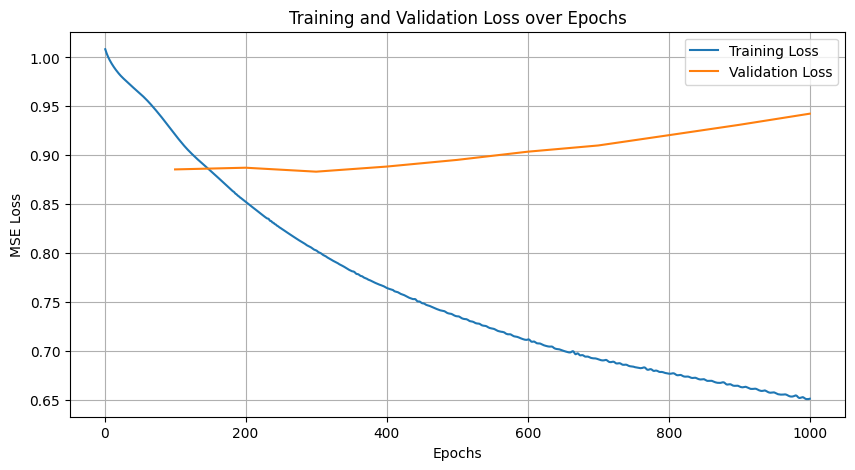

[I 2024-10-26 08:43:11,854] Trial 0 finished with value: 0.94248366355896 and parameters: {'lr': 0.0005877695820871008, 'num_layers': 3, 'hidden_size': 51}. Best is trial 0 with value: 0.94248366355896.


Learning Rate:  0.0005479591653705188


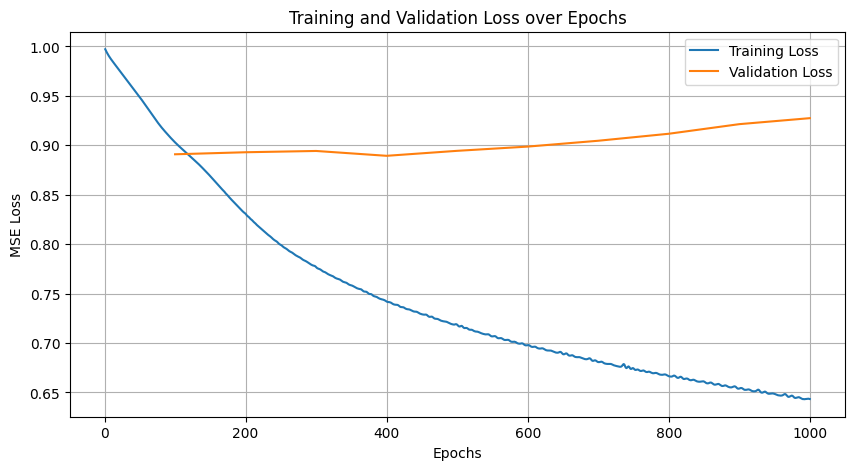

[I 2024-10-26 08:43:14,627] Trial 1 finished with value: 0.9274308681488037 and parameters: {'lr': 0.0005479591653705188, 'num_layers': 3, 'hidden_size': 64}. Best is trial 1 with value: 0.9274308681488037.


Learning Rate:  0.00010619969881978904


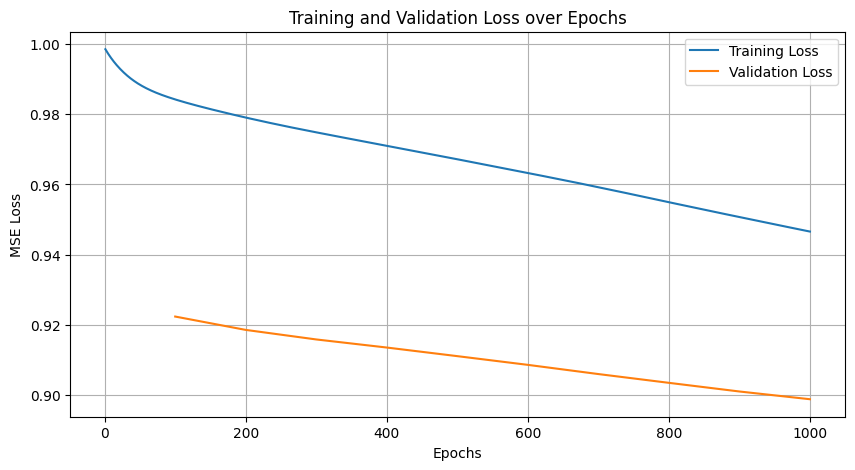

[I 2024-10-26 08:43:15,805] Trial 2 finished with value: 0.8988910913467407 and parameters: {'lr': 0.00010619969881978904, 'num_layers': 1, 'hidden_size': 62}. Best is trial 2 with value: 0.8988910913467407.


Learning Rate:  0.002017094551610563


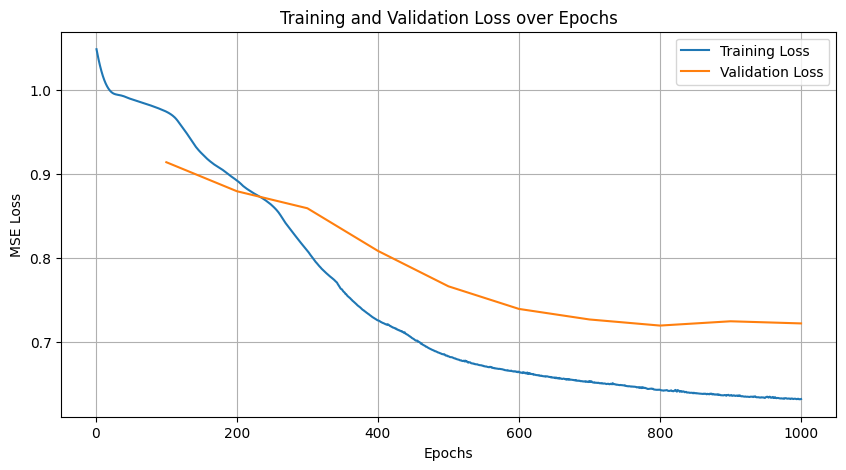

[I 2024-10-26 08:43:17,901] Trial 3 finished with value: 0.7216066718101501 and parameters: {'lr': 0.002017094551610563, 'num_layers': 4, 'hidden_size': 10}. Best is trial 3 with value: 0.7216066718101501.


Learning Rate:  0.0008379057994632645


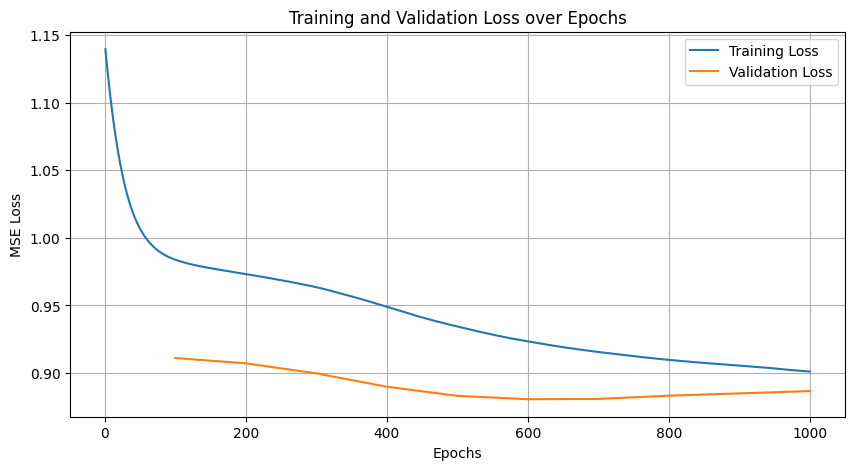

[I 2024-10-26 08:43:18,932] Trial 4 finished with value: 0.8866446018218994 and parameters: {'lr': 0.0008379057994632645, 'num_layers': 1, 'hidden_size': 19}. Best is trial 3 with value: 0.7216066718101501.


Learning Rate:  0.0002091466512977497


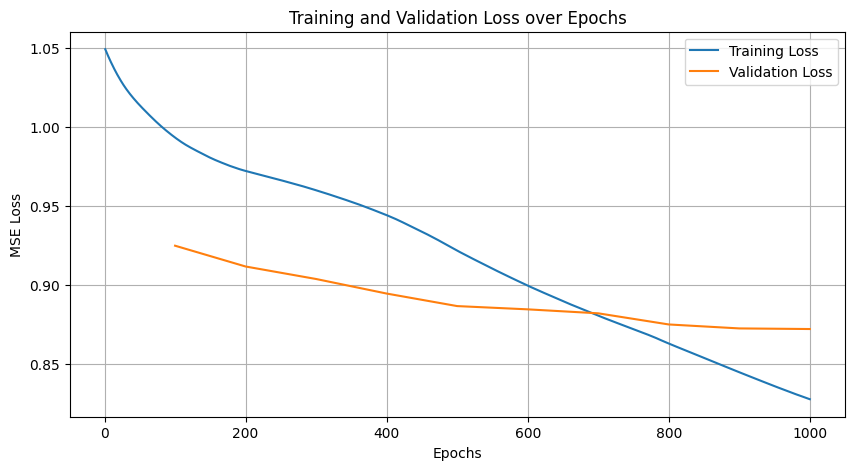

[I 2024-10-26 08:43:21,357] Trial 5 finished with value: 0.8721294403076172 and parameters: {'lr': 0.0002091466512977497, 'num_layers': 3, 'hidden_size': 29}. Best is trial 3 with value: 0.7216066718101501.


Learning Rate:  3.838657775429849e-05


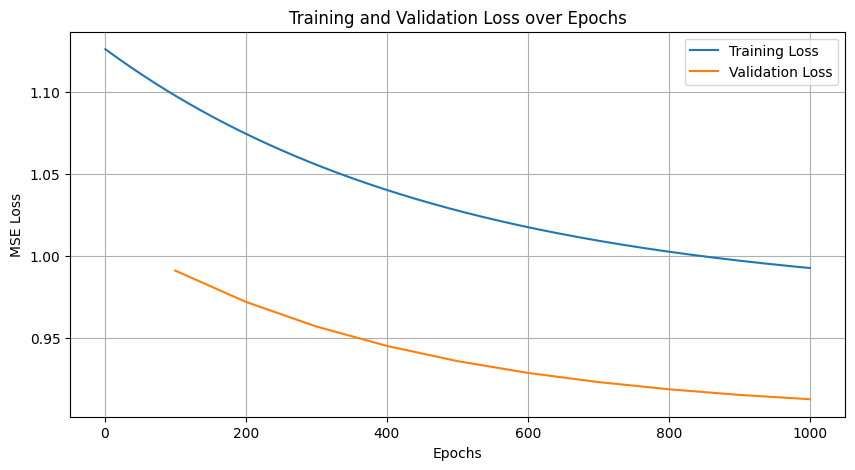

[I 2024-10-26 08:43:22,414] Trial 6 finished with value: 0.9130232334136963 and parameters: {'lr': 3.838657775429849e-05, 'num_layers': 1, 'hidden_size': 44}. Best is trial 3 with value: 0.7216066718101501.


Learning Rate:  0.0013703098657887216


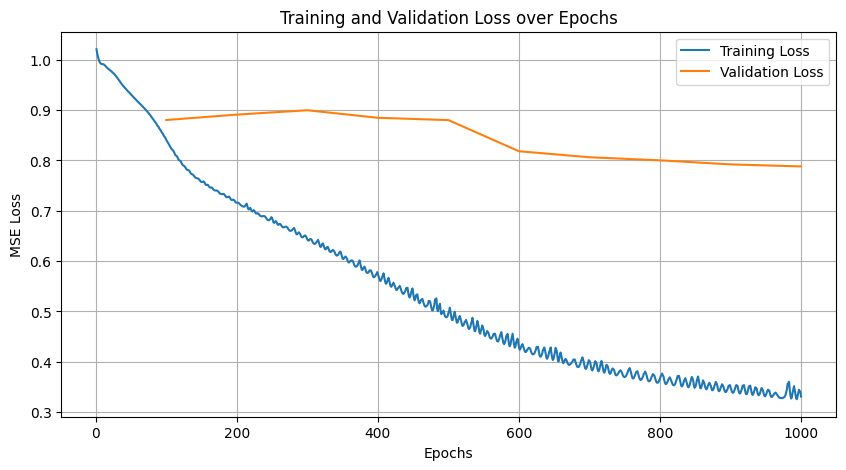

[I 2024-10-26 08:43:25,866] Trial 7 finished with value: 0.7880591154098511 and parameters: {'lr': 0.0013703098657887216, 'num_layers': 4, 'hidden_size': 64}. Best is trial 3 with value: 0.7216066718101501.


Learning Rate:  6.250025405136046e-05


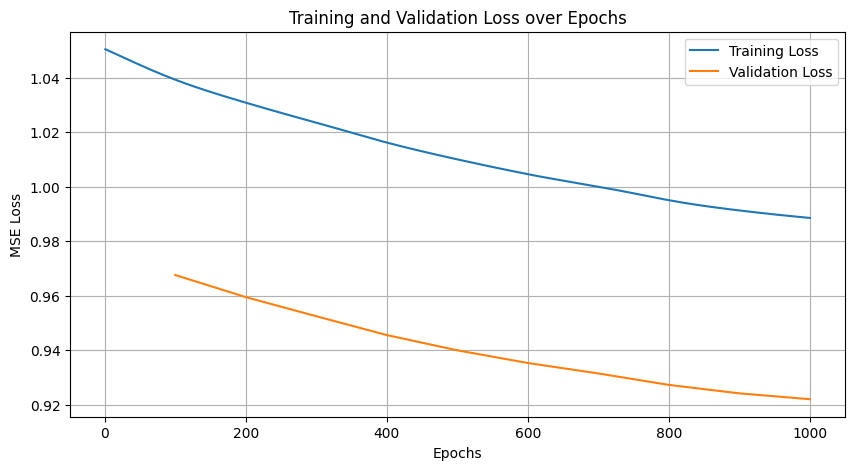

[I 2024-10-26 08:43:27,934] Trial 8 finished with value: 0.9220795631408691 and parameters: {'lr': 6.250025405136046e-05, 'num_layers': 4, 'hidden_size': 10}. Best is trial 3 with value: 0.7216066718101501.


Learning Rate:  0.00017513970151558425


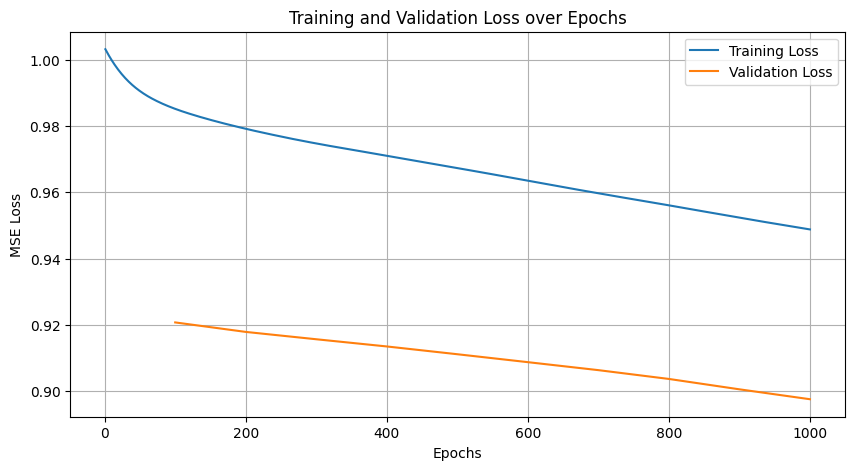

[I 2024-10-26 08:43:29,010] Trial 9 finished with value: 0.8974688649177551 and parameters: {'lr': 0.00017513970151558425, 'num_layers': 1, 'hidden_size': 33}. Best is trial 3 with value: 0.7216066718101501.


Learning Rate:  0.006288822934842169


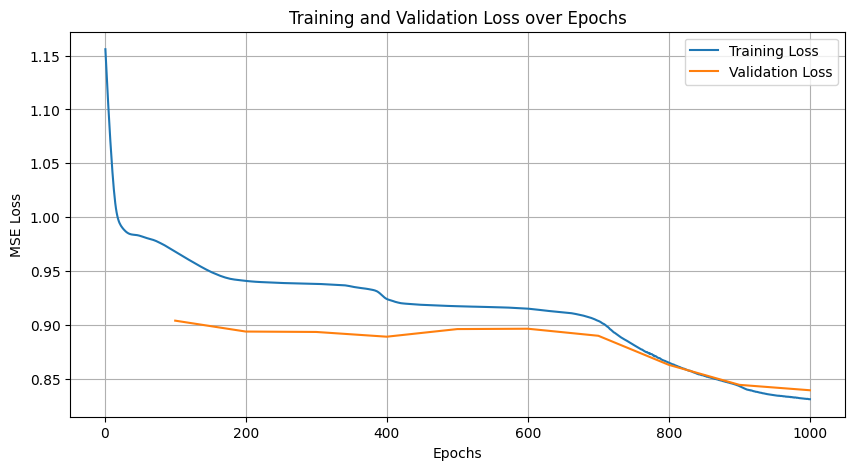

[I 2024-10-26 08:43:30,501] Trial 10 finished with value: 0.8392810821533203 and parameters: {'lr': 0.006288822934842169, 'num_layers': 2, 'hidden_size': 4}. Best is trial 3 with value: 0.7216066718101501.


Learning Rate:  0.0038969523616381556


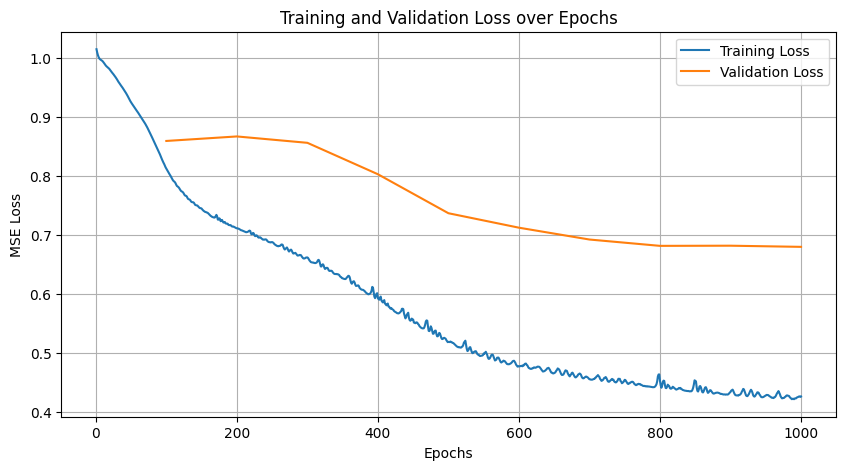

[I 2024-10-26 08:43:32,627] Trial 11 finished with value: 0.6799665093421936 and parameters: {'lr': 0.0038969523616381556, 'num_layers': 4, 'hidden_size': 18}. Best is trial 11 with value: 0.6799665093421936.


Learning Rate:  0.006179723474512332


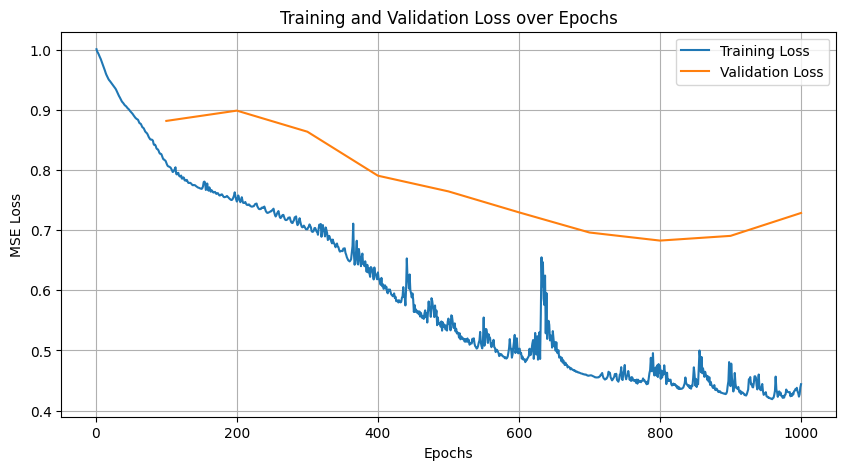

[I 2024-10-26 08:43:35,085] Trial 12 finished with value: 0.7286880612373352 and parameters: {'lr': 0.006179723474512332, 'num_layers': 4, 'hidden_size': 19}. Best is trial 11 with value: 0.6799665093421936.


Learning Rate:  0.0023642033625247273


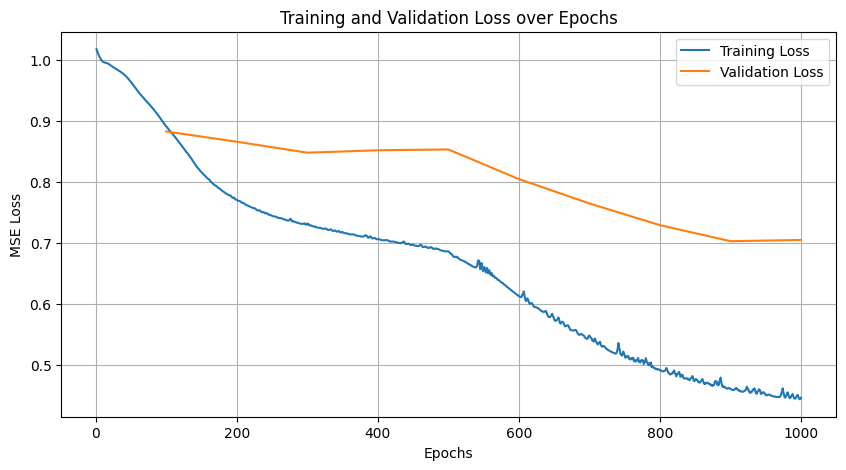

[I 2024-10-26 08:43:37,275] Trial 13 finished with value: 0.7048631906509399 and parameters: {'lr': 0.0023642033625247273, 'num_layers': 4, 'hidden_size': 18}. Best is trial 11 with value: 0.6799665093421936.


Learning Rate:  0.002748735428812428


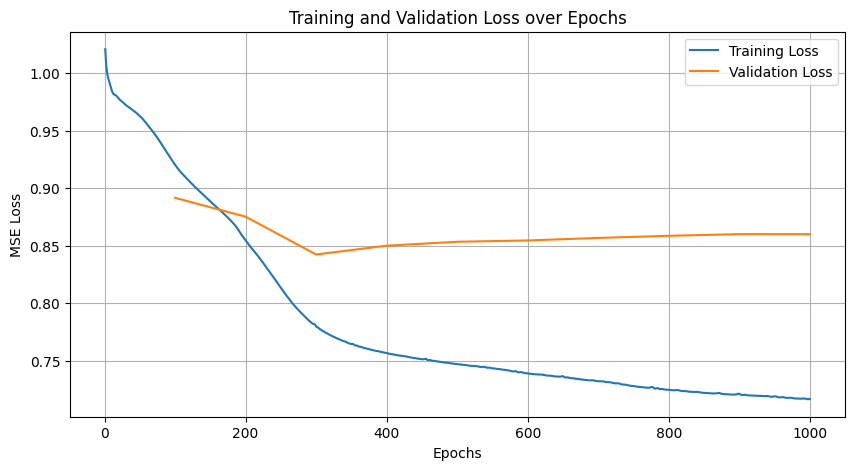

[I 2024-10-26 08:43:38,839] Trial 14 finished with value: 0.8599754571914673 and parameters: {'lr': 0.002748735428812428, 'num_layers': 2, 'hidden_size': 22}. Best is trial 11 with value: 0.6799665093421936.


Learning Rate:  0.003660847829727513


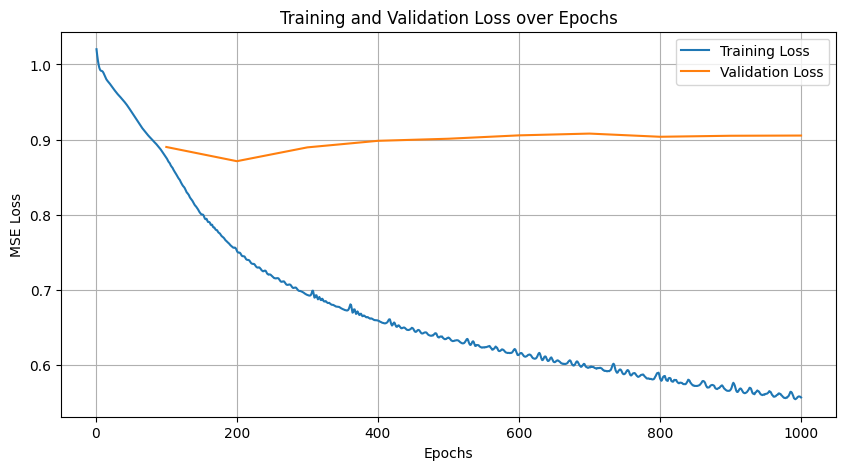

[I 2024-10-26 08:43:40,959] Trial 15 finished with value: 0.9053971171379089 and parameters: {'lr': 0.003660847829727513, 'num_layers': 3, 'hidden_size': 26}. Best is trial 11 with value: 0.6799665093421936.


Learning Rate:  1.3355851410495005e-05


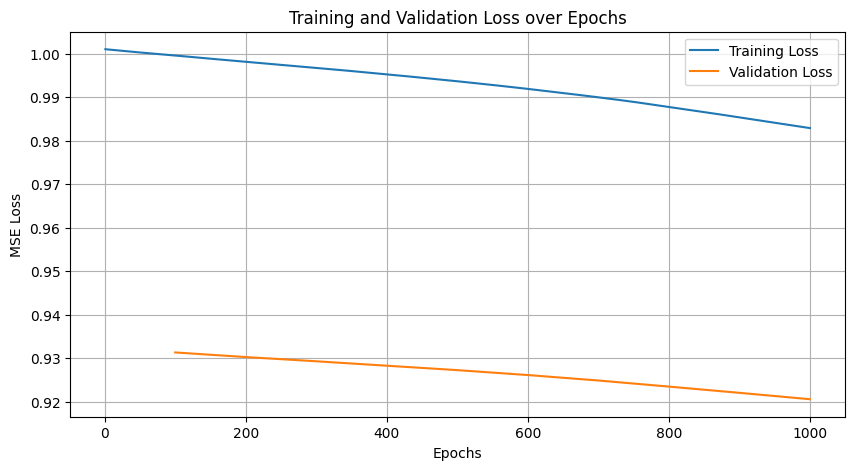

[I 2024-10-26 08:43:43,636] Trial 16 finished with value: 0.9205347895622253 and parameters: {'lr': 1.3355851410495005e-05, 'num_layers': 4, 'hidden_size': 40}. Best is trial 11 with value: 0.6799665093421936.


Learning Rate:  0.009776194734725923


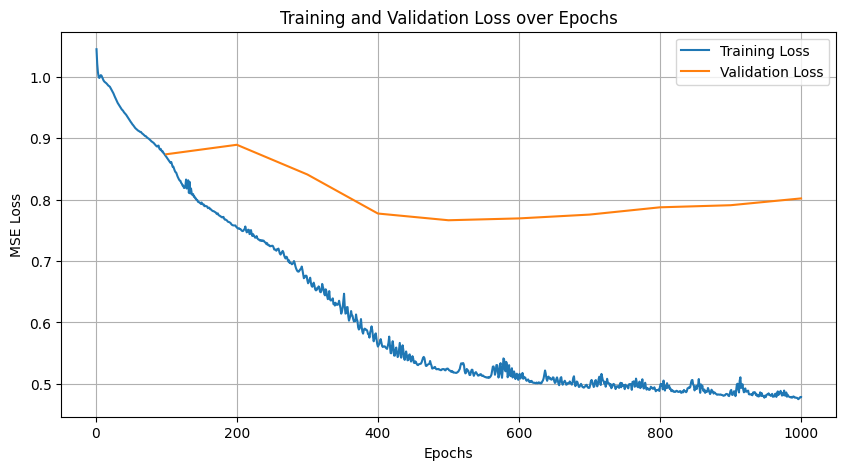

[I 2024-10-26 08:43:45,931] Trial 17 finished with value: 0.8020265102386475 and parameters: {'lr': 0.009776194734725923, 'num_layers': 4, 'hidden_size': 14}. Best is trial 11 with value: 0.6799665093421936.


Learning Rate:  0.0016124948191123141


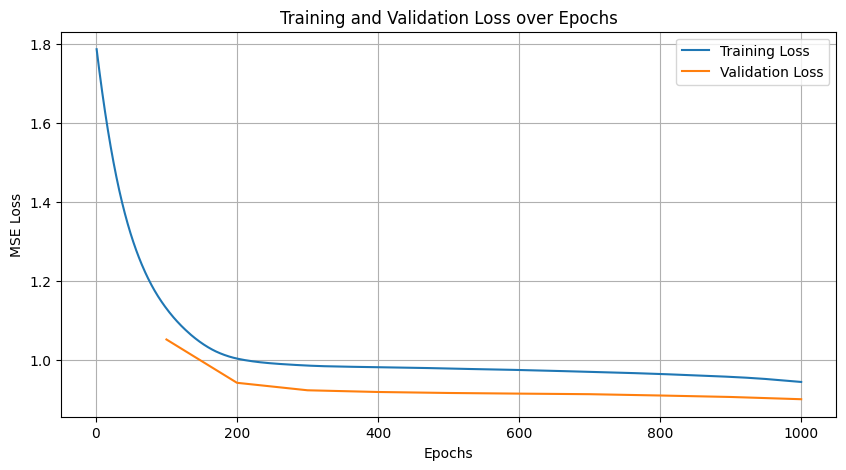

[I 2024-10-26 08:43:47,285] Trial 18 finished with value: 0.8996793031692505 and parameters: {'lr': 0.0016124948191123141, 'num_layers': 2, 'hidden_size': 3}. Best is trial 11 with value: 0.6799665093421936.


Learning Rate:  0.003940190267333918


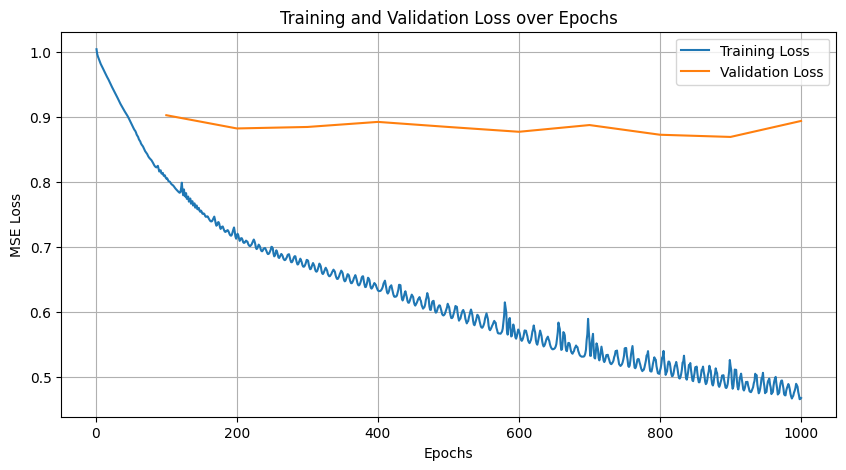

[I 2024-10-26 08:43:49,720] Trial 19 finished with value: 0.8942916989326477 and parameters: {'lr': 0.003940190267333918, 'num_layers': 3, 'hidden_size': 37}. Best is trial 11 with value: 0.6799665093421936.


Learning Rate:  0.0003663874275019623


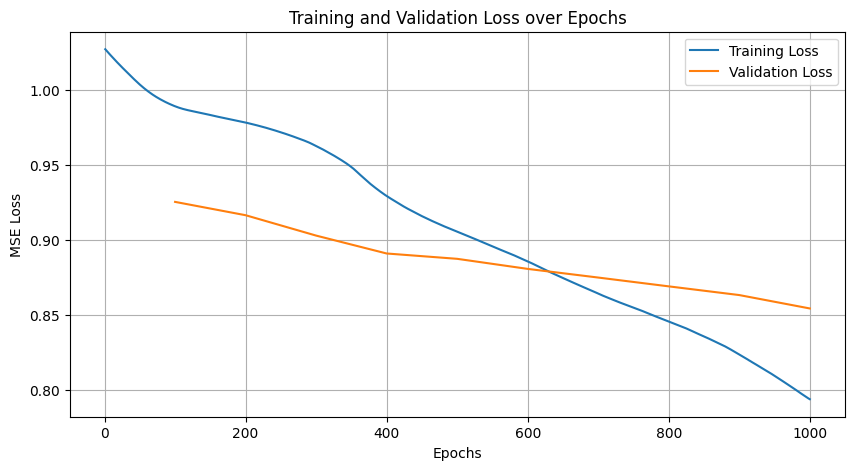

[I 2024-10-26 08:43:51,948] Trial 20 finished with value: 0.8542435169219971 and parameters: {'lr': 0.0003663874275019623, 'num_layers': 4, 'hidden_size': 16}. Best is trial 11 with value: 0.6799665093421936.


Learning Rate:  0.001767729638295161


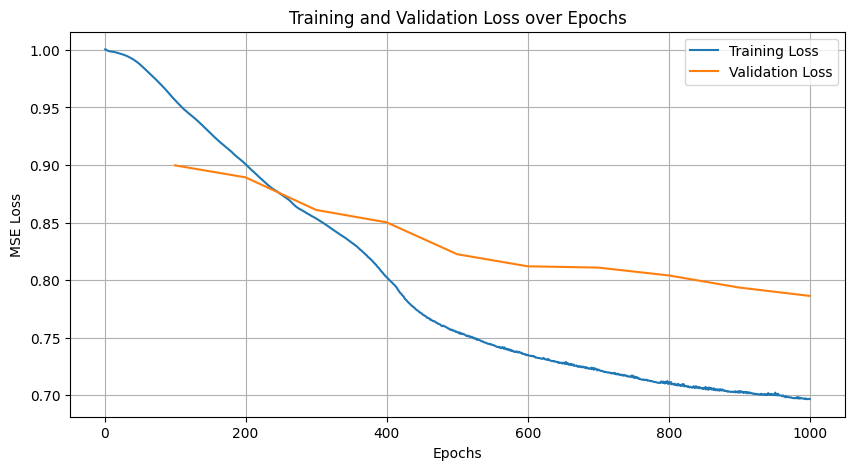

[I 2024-10-26 08:43:54,049] Trial 21 finished with value: 0.7862493395805359 and parameters: {'lr': 0.001767729638295161, 'num_layers': 4, 'hidden_size': 7}. Best is trial 11 with value: 0.6799665093421936.


Learning Rate:  0.001179046706208782


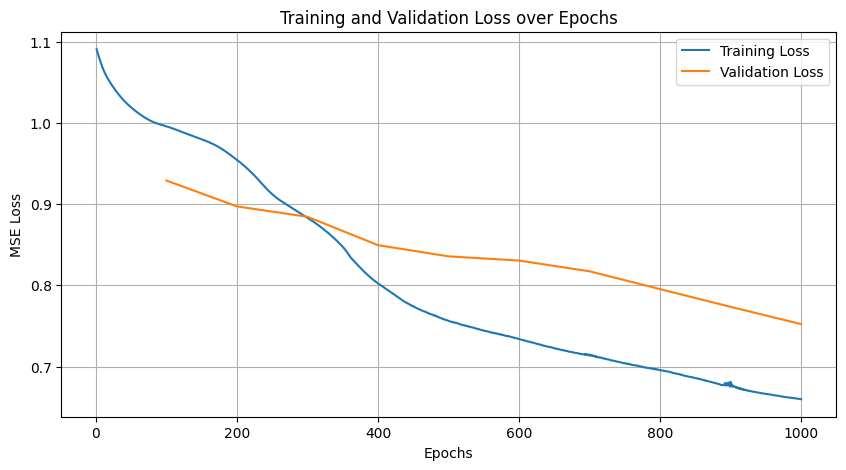

[I 2024-10-26 08:43:56,312] Trial 22 finished with value: 0.7522904872894287 and parameters: {'lr': 0.001179046706208782, 'num_layers': 4, 'hidden_size': 12}. Best is trial 11 with value: 0.6799665093421936.


Learning Rate:  0.0023859821082911695


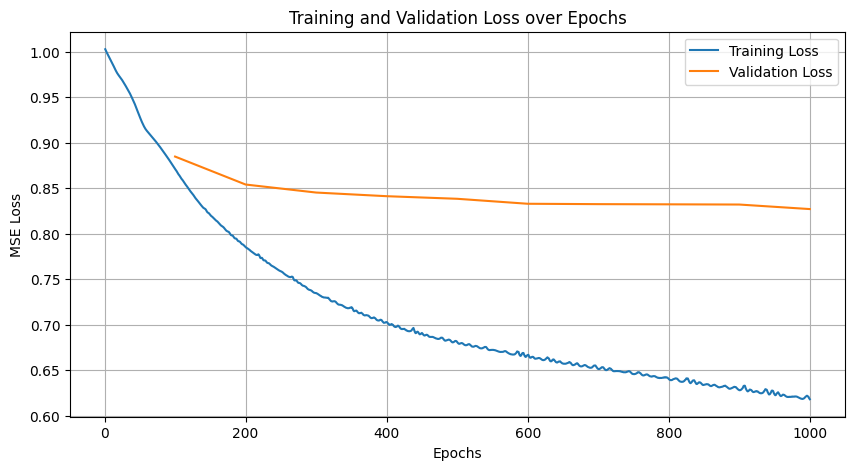

[I 2024-10-26 08:43:58,494] Trial 23 finished with value: 0.8270332217216492 and parameters: {'lr': 0.0023859821082911695, 'num_layers': 3, 'hidden_size': 24}. Best is trial 11 with value: 0.6799665093421936.


Learning Rate:  0.004685120005531051


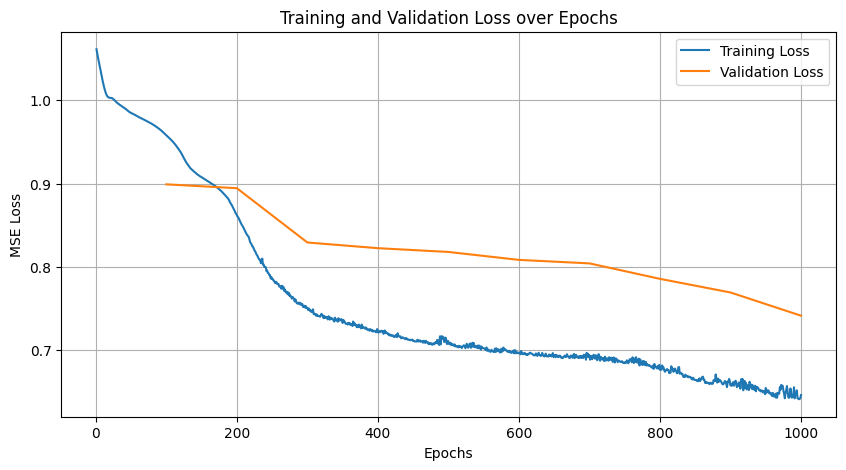

[I 2024-10-26 08:44:00,648] Trial 24 finished with value: 0.7413454055786133 and parameters: {'lr': 0.004685120005531051, 'num_layers': 4, 'hidden_size': 9}. Best is trial 11 with value: 0.6799665093421936.


Learning Rate:  0.009662021444705186


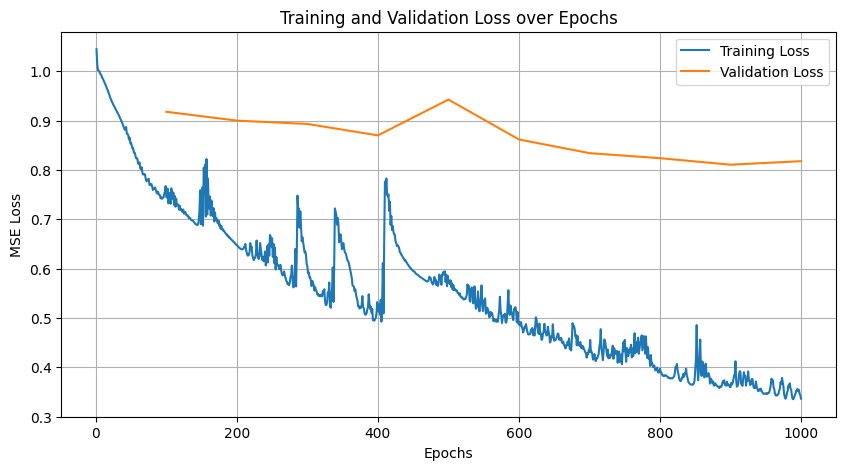

[I 2024-10-26 08:44:03,780] Trial 25 finished with value: 0.8176589012145996 and parameters: {'lr': 0.009662021444705186, 'num_layers': 4, 'hidden_size': 30}. Best is trial 11 with value: 0.6799665093421936.


Learning Rate:  0.0009423625888885477


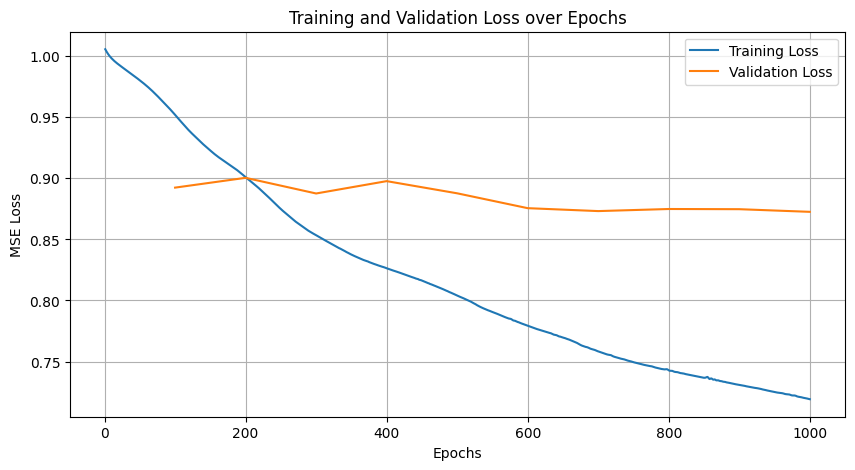

[I 2024-10-26 08:44:05,717] Trial 26 finished with value: 0.8725889921188354 and parameters: {'lr': 0.0009423625888885477, 'num_layers': 3, 'hidden_size': 17}. Best is trial 11 with value: 0.6799665093421936.


Learning Rate:  0.0028587309096378406


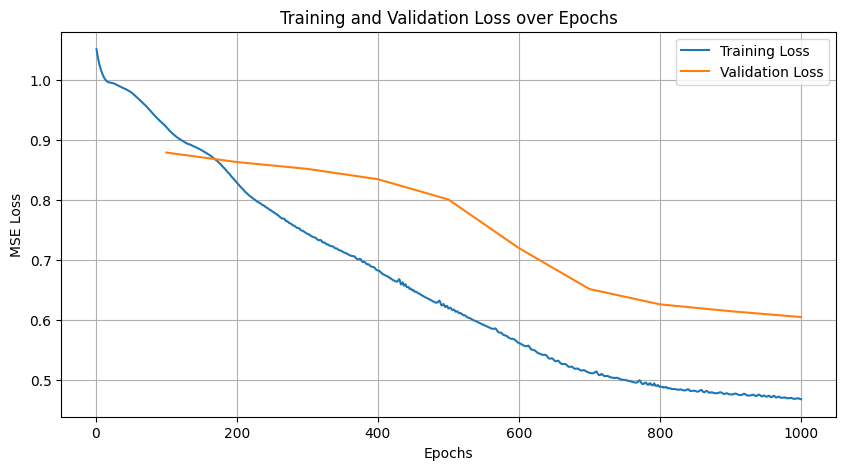

[I 2024-10-26 08:44:07,987] Trial 27 finished with value: 0.6043241620063782 and parameters: {'lr': 0.0028587309096378406, 'num_layers': 4, 'hidden_size': 13}. Best is trial 27 with value: 0.6043241620063782.


Learning Rate:  0.002887001494789737


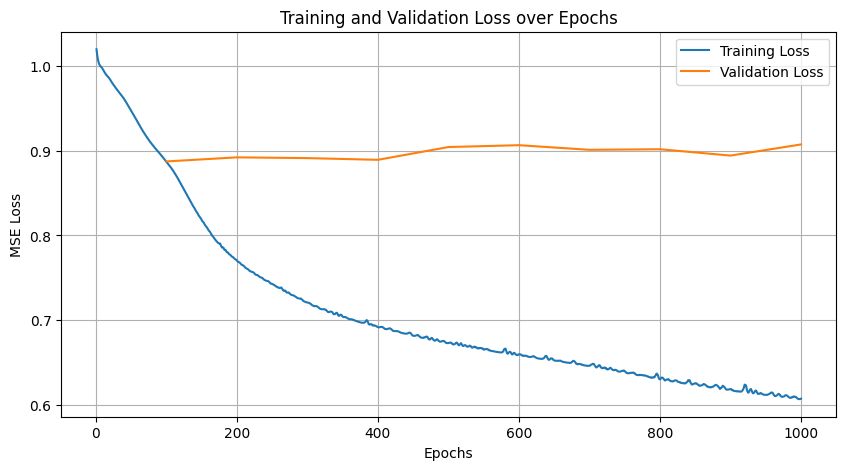

[I 2024-10-26 08:44:10,069] Trial 28 finished with value: 0.9072774052619934 and parameters: {'lr': 0.002887001494789737, 'num_layers': 3, 'hidden_size': 21}. Best is trial 27 with value: 0.6043241620063782.


Learning Rate:  0.0005571338667307972


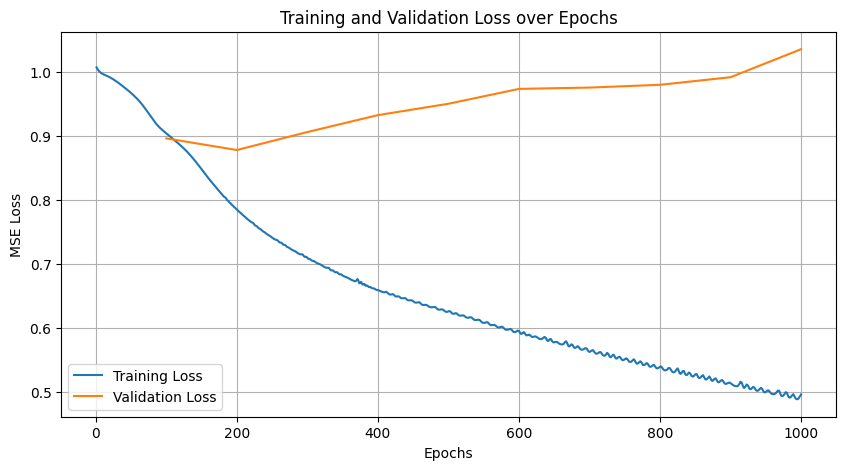

[I 2024-10-26 08:44:13,558] Trial 29 finished with value: 1.0349925756454468 and parameters: {'lr': 0.0005571338667307972, 'num_layers': 4, 'hidden_size': 55}. Best is trial 27 with value: 0.6043241620063782.


Learning Rate:  0.00691533251931633


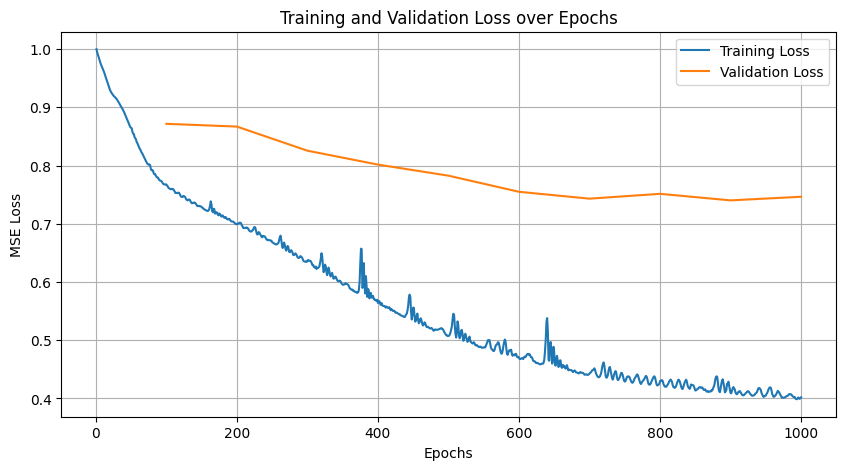

[I 2024-10-26 08:44:15,731] Trial 30 finished with value: 0.7464178800582886 and parameters: {'lr': 0.00691533251931633, 'num_layers': 3, 'hidden_size': 26}. Best is trial 27 with value: 0.6043241620063782.


Learning Rate:  0.0025985373877450675


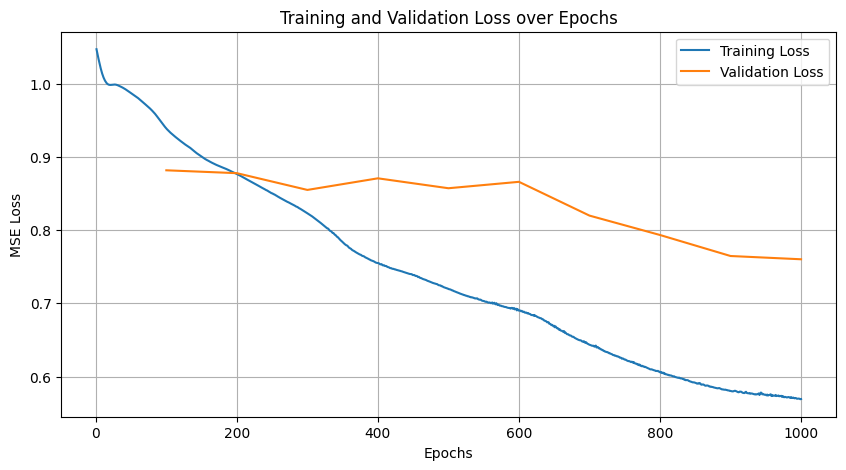

[I 2024-10-26 08:44:17,883] Trial 31 finished with value: 0.7601900696754456 and parameters: {'lr': 0.0025985373877450675, 'num_layers': 4, 'hidden_size': 13}. Best is trial 27 with value: 0.6043241620063782.


Learning Rate:  0.002142025286365405


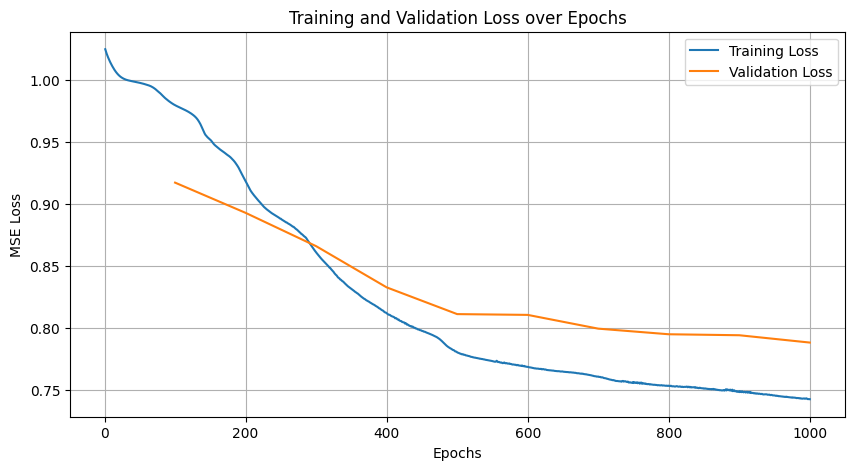

[I 2024-10-26 08:44:19,889] Trial 32 finished with value: 0.7882853150367737 and parameters: {'lr': 0.002142025286365405, 'num_layers': 4, 'hidden_size': 8}. Best is trial 27 with value: 0.6043241620063782.


Learning Rate:  0.0008452900017532614


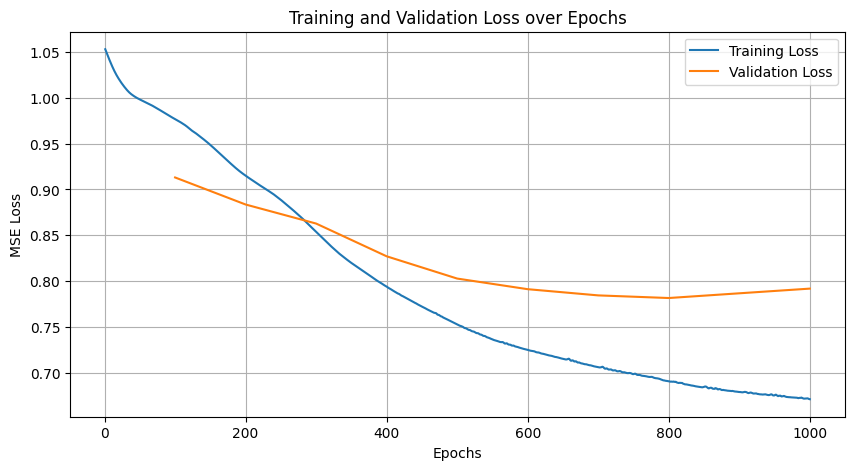

[I 2024-10-26 08:44:22,211] Trial 33 finished with value: 0.7917274236679077 and parameters: {'lr': 0.0008452900017532614, 'num_layers': 4, 'hidden_size': 15}. Best is trial 27 with value: 0.6043241620063782.


Learning Rate:  0.0004508069210487199


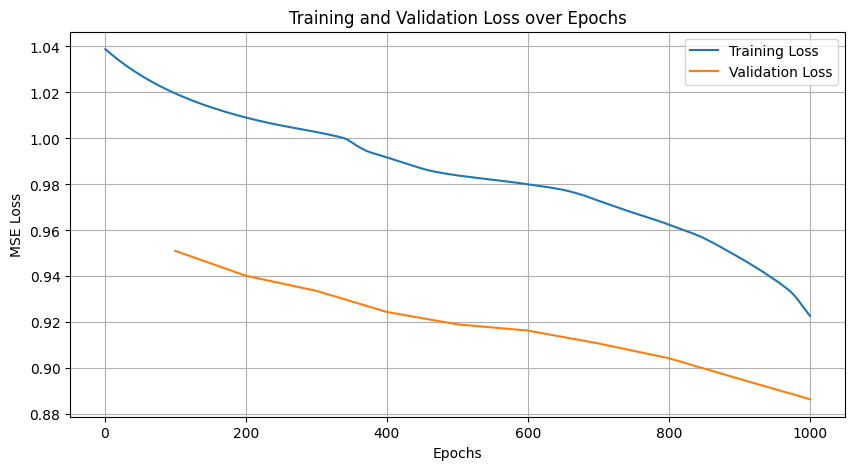

[I 2024-10-26 08:44:24,301] Trial 34 finished with value: 0.8865799903869629 and parameters: {'lr': 0.0004508069210487199, 'num_layers': 4, 'hidden_size': 5}. Best is trial 27 with value: 0.6043241620063782.


Learning Rate:  0.00410588173252705


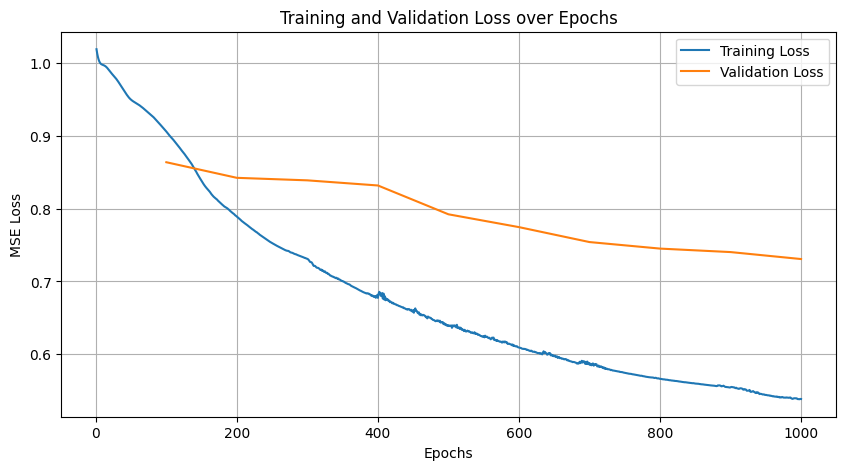

[I 2024-10-26 08:44:26,135] Trial 35 finished with value: 0.7307623624801636 and parameters: {'lr': 0.00410588173252705, 'num_layers': 3, 'hidden_size': 11}. Best is trial 27 with value: 0.6043241620063782.


Learning Rate:  0.00025809494741092743


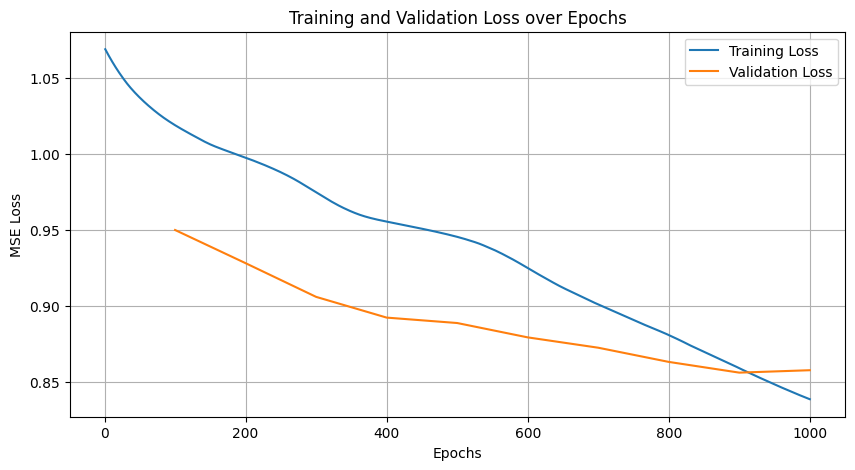

[I 2024-10-26 08:44:28,540] Trial 36 finished with value: 0.8578108549118042 and parameters: {'lr': 0.00025809494741092743, 'num_layers': 4, 'hidden_size': 19}. Best is trial 27 with value: 0.6043241620063782.


Learning Rate:  0.0011289736433629893


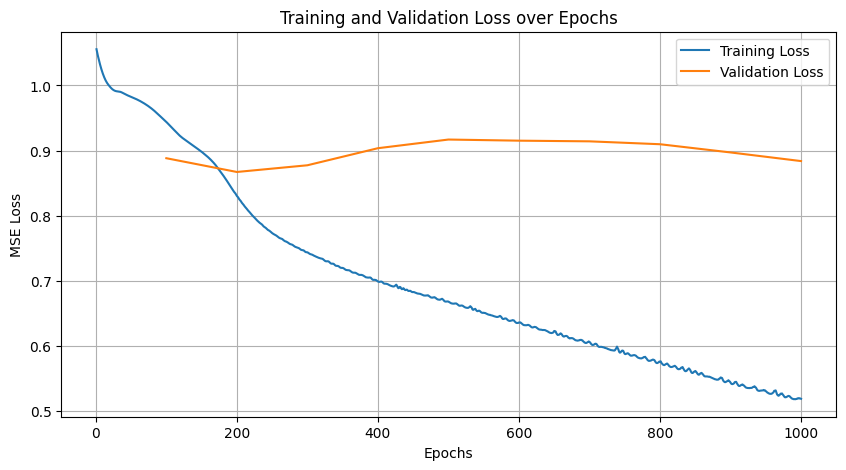

[I 2024-10-26 08:44:31,336] Trial 37 finished with value: 0.8837864995002747 and parameters: {'lr': 0.0011289736433629893, 'num_layers': 4, 'hidden_size': 30}. Best is trial 27 with value: 0.6043241620063782.


Learning Rate:  0.0006098660461494626


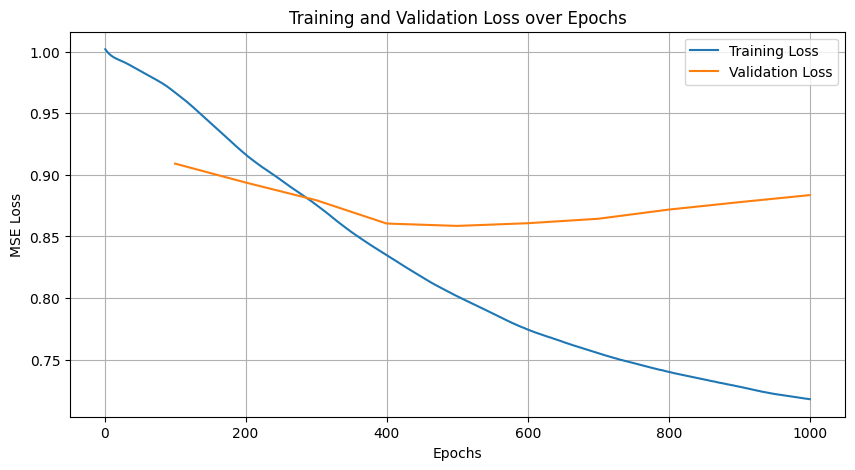

[I 2024-10-26 08:44:33,301] Trial 38 finished with value: 0.8835155367851257 and parameters: {'lr': 0.0006098660461494626, 'num_layers': 3, 'hidden_size': 22}. Best is trial 27 with value: 0.6043241620063782.


Learning Rate:  0.001555056091924509


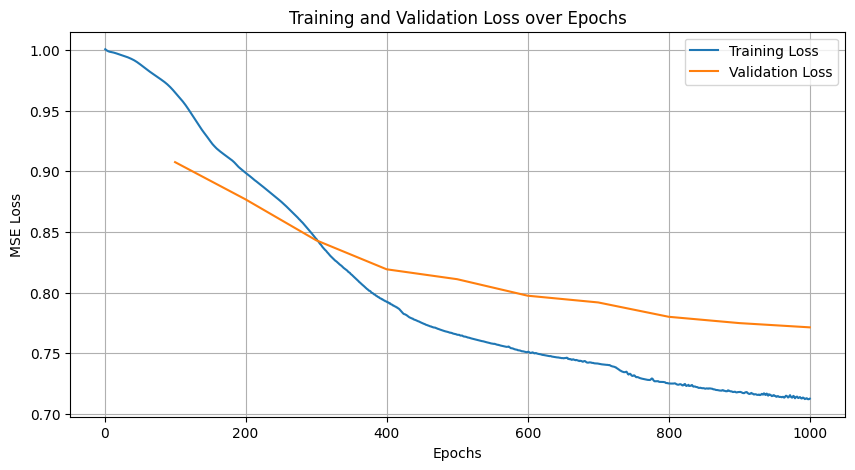

[I 2024-10-26 08:44:35,494] Trial 39 finished with value: 0.7713367938995361 and parameters: {'lr': 0.001555056091924509, 'num_layers': 4, 'hidden_size': 7}. Best is trial 27 with value: 0.6043241620063782.


Learning Rate:  0.005450239703645222


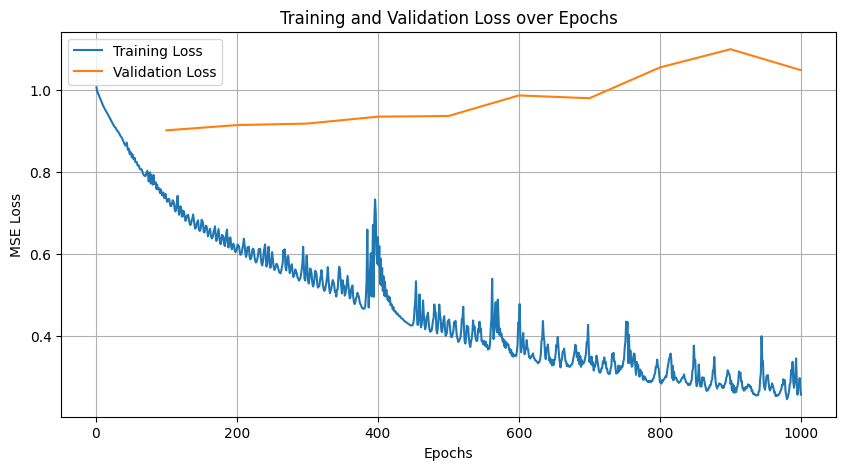

[I 2024-10-26 08:44:38,835] Trial 40 finished with value: 1.047668695449829 and parameters: {'lr': 0.005450239703645222, 'num_layers': 4, 'hidden_size': 46}. Best is trial 27 with value: 0.6043241620063782.


Learning Rate:  0.00661153302614161


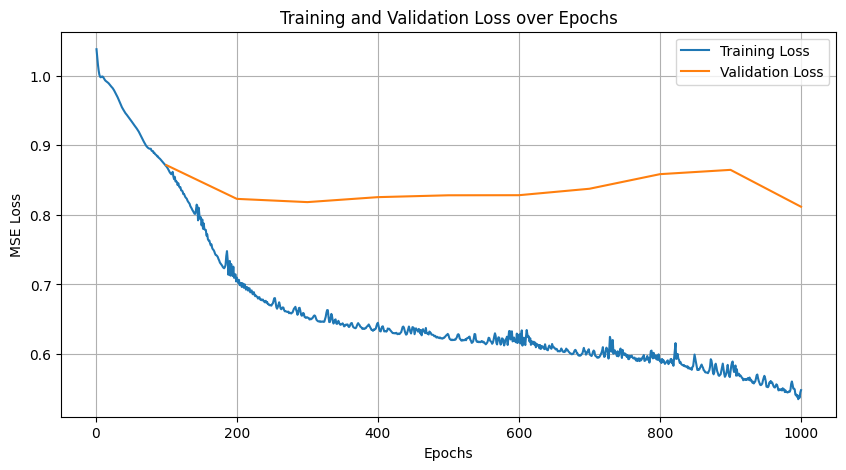

[I 2024-10-26 08:44:41,138] Trial 41 finished with value: 0.8116239309310913 and parameters: {'lr': 0.00661153302614161, 'num_layers': 4, 'hidden_size': 19}. Best is trial 27 with value: 0.6043241620063782.


Learning Rate:  0.0032195852894766038


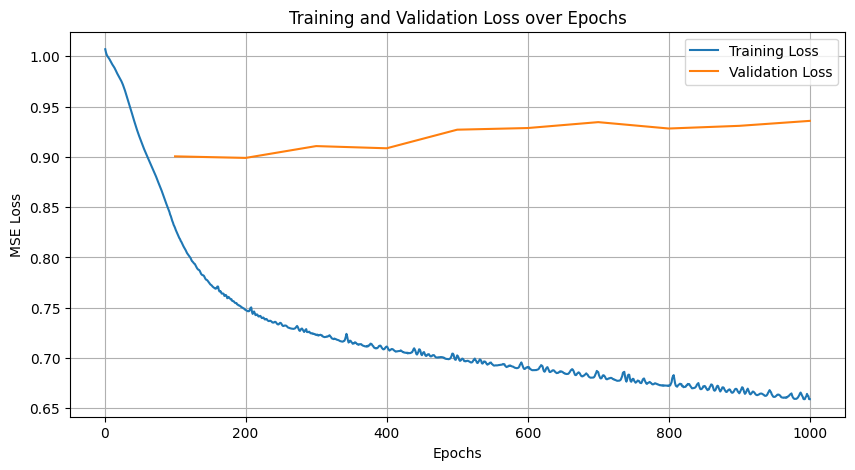

[I 2024-10-26 08:44:43,323] Trial 42 finished with value: 0.9357228875160217 and parameters: {'lr': 0.0032195852894766038, 'num_layers': 4, 'hidden_size': 17}. Best is trial 27 with value: 0.6043241620063782.


Learning Rate:  0.0076100502404428064


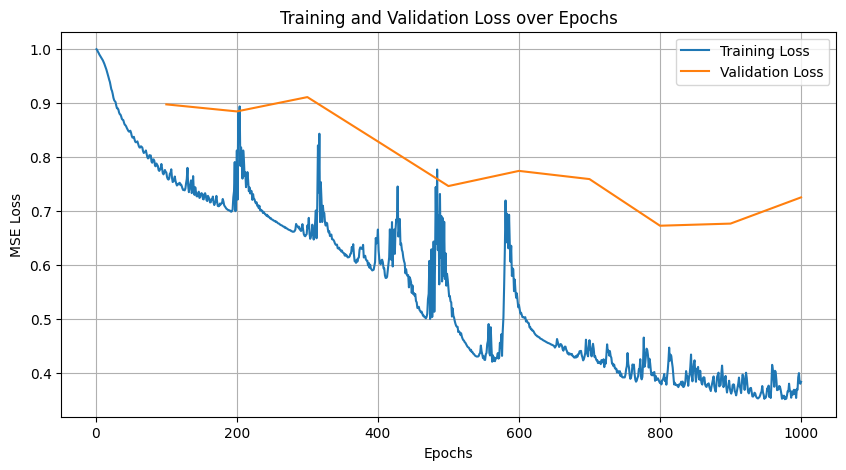

[I 2024-10-26 08:44:46,247] Trial 43 finished with value: 0.7250772714614868 and parameters: {'lr': 0.0076100502404428064, 'num_layers': 4, 'hidden_size': 26}. Best is trial 27 with value: 0.6043241620063782.


Learning Rate:  0.008324819521404913


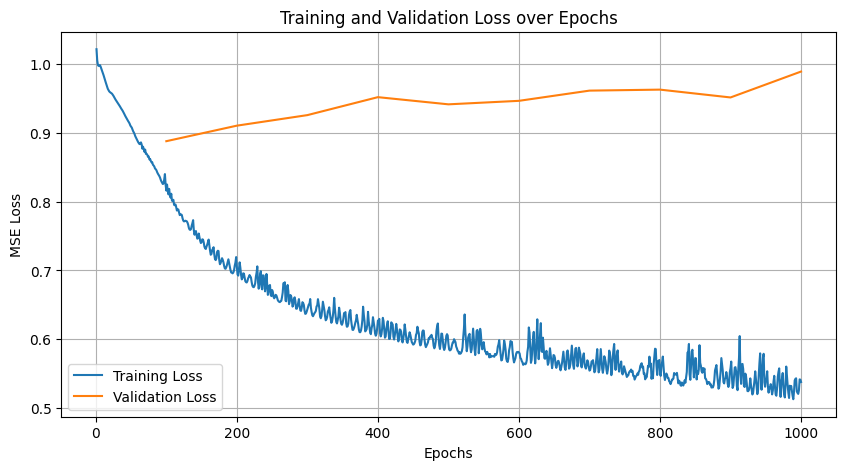

[I 2024-10-26 08:44:49,044] Trial 44 finished with value: 0.9889047741889954 and parameters: {'lr': 0.008324819521404913, 'num_layers': 4, 'hidden_size': 26}. Best is trial 27 with value: 0.6043241620063782.


Learning Rate:  0.00011437758061417424


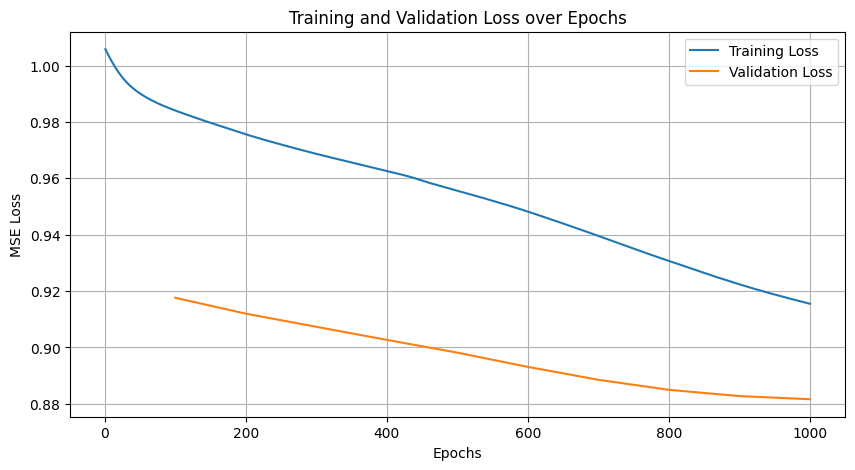

[I 2024-10-26 08:44:50,837] Trial 45 finished with value: 0.8816197514533997 and parameters: {'lr': 0.00011437758061417424, 'num_layers': 2, 'hidden_size': 34}. Best is trial 27 with value: 0.6043241620063782.


Learning Rate:  0.0020257238882838906


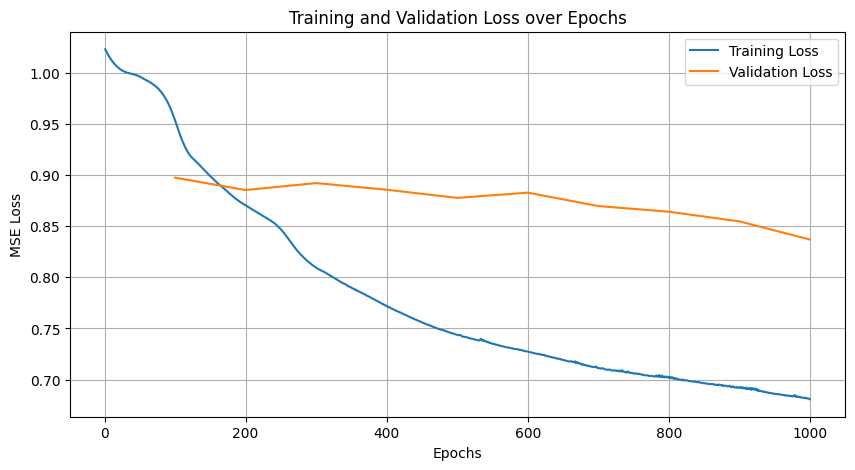

[I 2024-10-26 08:44:53,021] Trial 46 finished with value: 0.8368468880653381 and parameters: {'lr': 0.0020257238882838906, 'num_layers': 4, 'hidden_size': 11}. Best is trial 27 with value: 0.6043241620063782.


Learning Rate:  0.005006203193948021


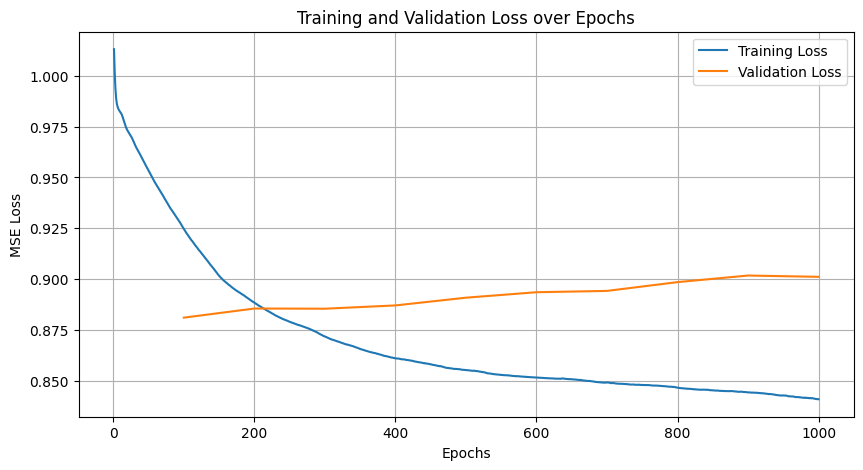

[I 2024-10-26 08:44:54,098] Trial 47 finished with value: 0.9011740684509277 and parameters: {'lr': 0.005006203193948021, 'num_layers': 1, 'hidden_size': 28}. Best is trial 27 with value: 0.6043241620063782.


Learning Rate:  0.0035670396141955583


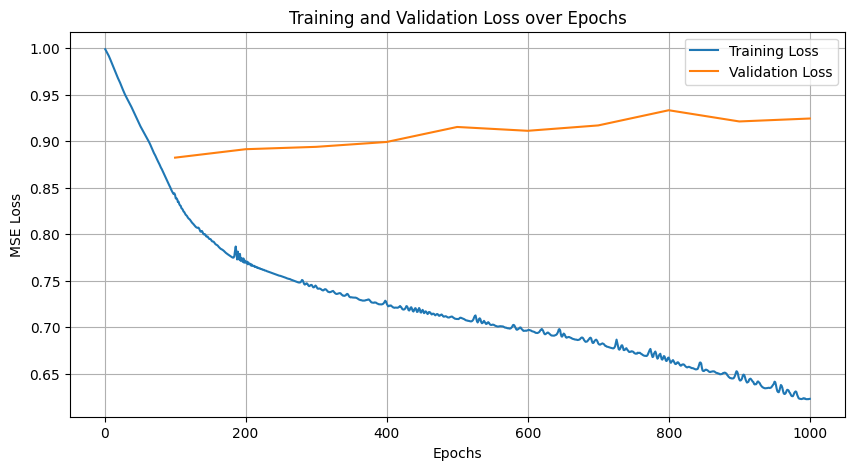

[I 2024-10-26 08:44:56,303] Trial 48 finished with value: 0.9245368242263794 and parameters: {'lr': 0.0035670396141955583, 'num_layers': 3, 'hidden_size': 22}. Best is trial 27 with value: 0.6043241620063782.


Learning Rate:  0.0006939588338643931


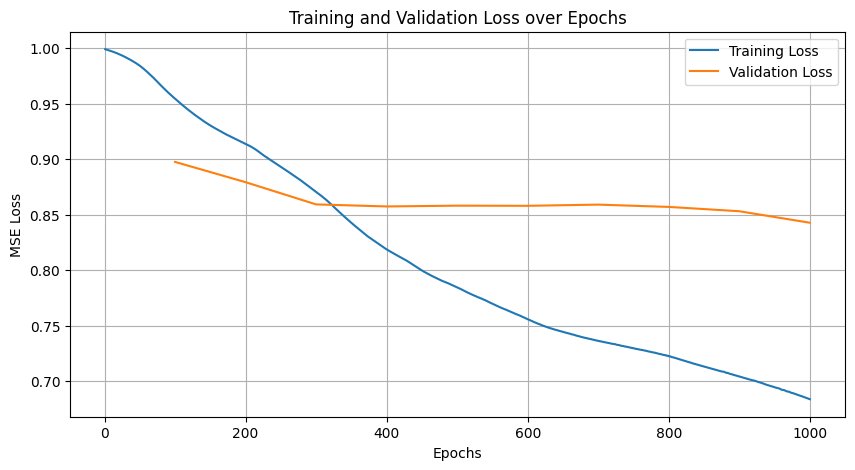

[I 2024-10-26 08:44:58,556] Trial 49 finished with value: 0.842721700668335 and parameters: {'lr': 0.0006939588338643931, 'num_layers': 4, 'hidden_size': 15}. Best is trial 27 with value: 0.6043241620063782.


Best hyperparameters:  {'lr': 0.0028587309096378406, 'num_layers': 4, 'hidden_size': 13}


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import optuna
import matplotlib.pyplot as plt

# Define tu modelo de red neuronal
class TrafficModel(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(TrafficModel, self).__init__()
        layers = []
        in_size = input_size
        for h in hidden_sizes:
            layers.append(nn.Linear(in_size, h))
            layers.append(nn.ReLU())
            in_size = h
        layers.append(nn.Linear(in_size, output_size))
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

# Función objetivo para la optimización de hiperparámetros
def objective(trial):
    # Define el espacio de búsqueda de hiperparámetros
    lr = trial.suggest_loguniform('lr', 1e-5, 1e-2,)
    num_layers = trial.suggest_int('num_layers', 1, 4)
    hidden_size = trial.suggest_int('hidden_size', 3, 64)

    # Define el modelo
    model = TrafficModel(input_size=X_train.shape[1], hidden_sizes=[hidden_size] * num_layers, output_size=1)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Listas para almacenar las pérdidas
    train_losses = []
    val_losses = []

    # Bucle de entrenamiento
    for epoch in range(1000):  # Ajusta el número de épocas según sea necesario
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        train_losses.append(loss.item())  # Guardar pérdida de entrenamiento
        loss.backward()
        optimizer.step()

        # Calcular pérdida de validación cada 100 épocas
        if (epoch + 1) % 100 == 0:
            model.eval()
            with torch.no_grad():
                val_outputs = model(X_test_tensor)
                val_loss = criterion(val_outputs, y_test_tensor)
                val_losses.append(val_loss.item())  # Guardar pérdida de validación

    # Visualizar las pérdidas
    print("Learning Rate: ",lr)
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
    plt.plot(range(100, len(train_losses) + 1, 100), val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('MSE Loss')
    plt.title('Training and Validation Loss over Epochs')
    plt.legend()
    plt.grid()
    plt.show()

    return val_losses[-1]  # Retornar la última pérdida de validación

# Ejecutar la optimización con Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

# Imprimir los mejores hiperparámetros encontrados
print("Best hyperparameters: ", study.best_params)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt


# Función de entrenamiento
def train_model(learning_rate, train_loader, val_loader, input_size, epochs=100):
    # lr = 0.00752
    num_layers = 4
    hidden_size = 13
    print(lr,num_layers, hidden_size)
    # Define el modelo
    model = TrafficModel(input_size=input_size, hidden_sizes=[hidden_size] * num_layers, output_size=1)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            print(loss)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_losses.append(running_loss / len(train_loader))

        # Evaluación en validación
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item()

        val_losses.append(val_loss / len(val_loader))

    return model, train_losses, val_losses


train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

val_data = TensorDataset(X_test_tensor, y_test_tensor)
val_loader = DataLoader(val_data, batch_size=32)

# Entrenamiento con diferentes tasas de aprendizaje
results = {}
input_size = X_train.shape[1]
learning_rates = [0.0006, 0.0001]

for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    model, train_losses, val_losses = train_model(lr, train_loader, val_loader, input_size)
    results[lr] = (train_losses, val_losses)

# Graficar las pérdidas de validación para cada tasa de aprendizaje
plt.figure(figsize=(10, 6))
for lr, (train_losses, val_losses) in results.items():
    plt.plot(val_losses, label=f"Learning rate: {lr}")
plt.title('Validation Loss vs Epochs for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss (MSE)')
plt.legend()
plt.show()


Training with learning rate: 0.0006
0.0006 60 234
tensor(0.7509, grad_fn=<MseLossBackward0>)
tensor(1.4429, grad_fn=<MseLossBackward0>)
tensor(0.8582, grad_fn=<MseLossBackward0>)
tensor(0.6884, grad_fn=<MseLossBackward0>)
tensor(0.8989, grad_fn=<MseLossBackward0>)
tensor(0.6362, grad_fn=<MseLossBackward0>)
tensor(1.2394, grad_fn=<MseLossBackward0>)
tensor(1.4984, grad_fn=<MseLossBackward0>)
tensor(0.4219, grad_fn=<MseLossBackward0>)
tensor(0.5877, grad_fn=<MseLossBackward0>)
tensor(1.0809, grad_fn=<MseLossBackward0>)
tensor(1.5280, grad_fn=<MseLossBackward0>)
tensor(0.6525, grad_fn=<MseLossBackward0>)
tensor(1.8636, grad_fn=<MseLossBackward0>)
tensor(1.6426, grad_fn=<MseLossBackward0>)
tensor(0.5828, grad_fn=<MseLossBackward0>)
tensor(1.0547, grad_fn=<MseLossBackward0>)
tensor(1.1952, grad_fn=<MseLossBackward0>)
tensor(0.7959, grad_fn=<MseLossBackward0>)
tensor(0.5912, grad_fn=<MseLossBackward0>)
tensor(0.6310, grad_fn=<MseLossBackward0>)
tensor(0.8874, grad_fn=<MseLossBackward0>)
tens

KeyboardInterrupt: 